In [1]:
# import torch
# from matplotlib import pyplot as plt
# from utils import *
# from trainer import Trainer
# from evaluator import Evaluator
# from tqdm import tqdm
# import pandas as pd

# %matplotlib inline
# %load_ext autoreload
# %autoreload 2

In [2]:
# # Initialize a list to store the results
# results = []

# data = get_dataset('sgra')
# keys = ["X", 'NIR', "IR", "submm"]
# num_keys = len(keys)
# iterations = 1000
# max_early_stop = 30
# plot_sample = 100

# print(f'Dataset has {len(data)} samples')

# for idx, sample in enumerate(tqdm(data)):
#     # Process the data
#     train_x, train_idx, train_y, test_x, test_y, test_idx = process_data(sample, keys)
#     full_train_x = torch.cat(train_x)
#     full_train_idx = torch.cat(train_idx)
#     full_train_y = torch.cat(train_y)

#     # Train the model
#     trainer = Trainer(full_train_x, full_train_idx, full_train_y, 'gaussian', iterations=iterations, max_early_stop=max_early_stop)
#     model, likelihood = trainer.train_model()

#     evaluator = Evaluator(model, likelihood, test_x, test_idx, num_keys)
#     observed_preds = evaluator.evaluate()

#     sample_results = {"sample_index": idx}
#     mse_total = 0
#     crps_total = 0

#     plot_data = []
#     for i in range(num_keys):
#         # Convert to numpy
#         train_xi = train_x[i].detach().numpy()
#         train_yi = train_y[i].detach().numpy()
#         test_xi = test_x[i].detach().numpy()
#         test_yi = test_y[i].detach().numpy()

#         means = observed_preds[i].mean.cpu().detach().numpy()
#         lower, upper = observed_preds[i].confidence_region()
#         lower, upper = lower.detach().cpu().numpy(), upper.cpu().detach().numpy()
#         standard_deviations = (upper - means) / 2.0

#         # Calculate metrics
#         crps = crps_norm(test_yi, means, standard_deviations)
#         mse = mean_squared_error(test_yi, means)
#         mse_total += mse
#         crps_total += crps

#         # Save metrics for the key
#         sample_results[f"mse_{keys[i]}"] = mse
#         sample_results[f"crps_{keys[i]}"] = crps

#     # Save averaged metrics
#     sample_results["average_mse"] = mse_total / num_keys
#     sample_results["average_crps"] = crps_total / num_keys
#     results.append(sample_results)

# # Save results to a CSV file
# results_df = pd.DataFrame(results)
# results_df.to_csv("results.csv", index=False)

# print("Processing complete. Results saved to 'results.csv' and plots saved to the 'plots/' directory.")


# Analysis


## Simulated Data

### Full Data Metrics

In [ ]:
# import torch
# from matplotlib import pyplot as plt
# from utils import *
# from trainer import Trainer
# from evaluator import Evaluator
# from tqdm import tqdm
# import pandas as pd
# import psutil
# import os
# import gc

# def print_gpu_memory_usage(device=None):
#     if device is None:
#         device = torch.cuda.current_device()  # Get the current CUDA device
#     allocated_memory = torch.cuda.memory_allocated(device) / 1024 / 1024  # Convert to MB
#     cached_memory = torch.cuda.memory_reserved(device) / 1024 / 1024  # Convert to MB
#     print(f"GPU Memory Usage (Allocated): {allocated_memory:.2f} MB")
#     print(f"GPU Memory Usage (Cached): {cached_memory:.2f} MB")


# %matplotlib inline
# %load_ext autoreload
# %autoreload 2

# # Set up keys and other parameters
# data = get_dataset('sgra')
# keys = ["X", 'NIR', "IR", "submm"]
# iterations = 1000
# max_early_stop = 30

# # Initialize variables to accumulate total MSE and CRPS across all samples and wavelengths
# total_mse_per_wavelength = {key: 0 for key in keys}
# total_crps_per_wavelength = {key: 0 for key in keys}
# total_mse_all = 0
# total_crps_all = 0
# num_samples = len(data)
# num_keys = len(keys)

# print(f'Dataset has {len(data)} samples')

# # Iterate over the dataset
# for idx, sample in enumerate(tqdm(data)):
#     # Process the data
#     train_x, train_idx, train_y, test_x, test_y, test_idx = process_data(sample, keys)
#     full_train_x = torch.cat(train_x)
#     full_train_idx = torch.cat(train_idx)
#     full_train_y = torch.cat(train_y)

#     # Train the model
#     trainer = Trainer(full_train_x, full_train_idx, full_train_y, 'gaussian', iterations=iterations, max_early_stop=max_early_stop)
#     model, likelihood = trainer.train_model()

#     evaluator = Evaluator(model, likelihood, test_x, test_idx, num_keys)
#     observed_preds = evaluator.evaluate()

#     # Process the results for each key
#     for i in range(num_keys):
#         # Convert to numpy
#         train_xi = train_x[i].detach().numpy()
#         train_yi = train_y[i].detach().numpy()
#         test_xi = test_x[i].detach().numpy()
#         test_yi = test_y[i].detach().numpy()

#         means = observed_preds[i].mean.cpu().detach().numpy()
#         lower, upper = observed_preds[i].confidence_region() # 2 std (95%)
#         lower, upper = lower.detach().cpu().numpy(), upper.cpu().detach().numpy()
#         standard_deviations = (upper - means) / 2.0

#         # Calculate metrics
#         crps = crps_norm(test_yi, means, standard_deviations)
#         mse = mean_squared_error(test_yi, means)

#         # Accumulate total metrics for each wavelength
#         total_mse_per_wavelength[keys[i]] += mse
#         total_crps_per_wavelength[keys[i]] += crps

#         # Accumulate total metrics for the entire dataset
#         total_mse_all += mse
#         total_crps_all += crps
    
#     del train_x, train_y, train_idx, test_x, test_y, test_idx, trainer, evaluator, model, likelihood, observed_preds, lower, upper, standard_deviations, means, full_train_x, full_train_y, full_train_idx, train_xi, train_yi, test_xi, test_yi
#     torch.cuda.empty_cache()  # If using GPU
#     gc.collect()
    
#     # print_gpu_memory_usage()

# # Calculate averages for each wavelength
# average_mse_per_wavelength = {key: total_mse_per_wavelength[key] / num_samples for key in keys}
# average_crps_per_wavelength = {key: total_crps_per_wavelength[key] / num_samples for key in keys}

# # Calculate total averages for the entire dataset
# average_mse_all = total_mse_all / (num_samples * num_keys)
# average_crps_all = total_crps_all / (num_samples * num_keys)

# # Prepare the results in a dictionary format
# final_results = {
#     "wavelength": keys,
#     "average_mse": [average_mse_per_wavelength[key] for key in keys],
#     "average_crps": [average_crps_per_wavelength[key] for key in keys],
#     "total_average_mse": [average_mse_all] * len(keys),
#     "total_average_crps": [average_crps_all] * len(keys),
# }

# # Create a DataFrame from the results
# results_df = pd.DataFrame(final_results)

# # Save the results to a CSV file
# results_df.to_csv("results.csv", index=False)

# print("Processing complete. Results saved to 'results.csv'.")

In [1]:
import torch
from matplotlib import pyplot as plt
from utils import *
from trainer import Trainer
from evaluator import Evaluator
from tqdm import tqdm
import pandas as pd
import psutil
import os
import gc

def print_gpu_memory_usage(device=None):
    if device is None:
        device = torch.cuda.current_device()  # Get the current CUDA device
    allocated_memory = torch.cuda.memory_allocated(device) / 1024 / 1024  # Convert to MB
    cached_memory = torch.cuda.memory_reserved(device) / 1024 / 1024  # Convert to MB
    print(f"GPU Memory Usage (Allocated): {allocated_memory:.2f} MB")
    print(f"GPU Memory Usage (Cached): {cached_memory:.2f} MB")


%matplotlib inline
%load_ext autoreload
%autoreload 2

# Set up keys and other parameters
data = get_dataset('sgra')
keys = ["X", 'NIR', "IR", "submm"]
iterations = 1000
max_early_stop = 30

# 🚀 Instead of totals, store all values for later mean/std calculation
all_mse_per_wavelength = {key: [] for key in keys}
all_crps_per_wavelength = {key: [] for key in keys}
all_mse_all = []
all_crps_all = []
num_samples = len(data)
num_keys = len(keys)

print(f'Dataset has {len(data)} samples')

# Iterate over the dataset
for idx, sample in enumerate(tqdm(data)):
    # Process the data
    train_x, train_idx, train_y, test_x, test_y, test_idx = process_data(sample, keys)
    full_train_x = torch.cat(train_x)
    full_train_idx = torch.cat(train_idx)
    full_train_y = torch.cat(train_y)

    # Train the model
    trainer = Trainer(full_train_x, full_train_idx, full_train_y, 'gaussian', iterations=iterations, max_early_stop=max_early_stop)
    model, likelihood = trainer.train_model()

    evaluator = Evaluator(model, likelihood, test_x, test_idx, num_keys)
    observed_preds = evaluator.evaluate()

    # Process the results for each key
    for i in range(num_keys):
        # Convert to numpy
        train_xi = train_x[i].detach().numpy()
        train_yi = train_y[i].detach().numpy()
        test_xi = test_x[i].detach().numpy()
        test_yi = test_y[i].detach().numpy()

        means = observed_preds[i].mean.cpu().detach().numpy()
        lower, upper = observed_preds[i].confidence_region() # 2 std (95%)
        lower, upper = lower.detach().cpu().numpy(), upper.cpu().detach().numpy()
        standard_deviations = (upper - means) / 2.0 # because 2sigma CI => upper - means /2 = std

        # Calculate metrics
        crps = crps_norm(test_yi, means, standard_deviations)
        mse = mean_squared_error(test_yi, means)

        # 🚀 Store metrics instead of summing
        all_mse_per_wavelength[keys[i]].append(mse)
        all_crps_per_wavelength[keys[i]].append(crps)
        all_mse_all.append(mse)
        all_crps_all.append(crps)
    
    # Cleanup
    del train_x, train_y, train_idx, test_x, test_y, test_idx, trainer, evaluator, model, likelihood, observed_preds, lower, upper, standard_deviations, means, full_train_x, full_train_y, full_train_idx, train_xi, train_yi, test_xi, test_yi
    torch.cuda.empty_cache()  # If using GPU
    gc.collect()
    
    # print_gpu_memory_usage()

# 🚀 Calculate averages and stds for each wavelength
average_mse_per_wavelength = {key: np.mean(all_mse_per_wavelength[key]) for key in keys}
std_mse_per_wavelength = {key: np.std(all_mse_per_wavelength[key]) for key in keys}

average_crps_per_wavelength = {key: np.mean(all_crps_per_wavelength[key]) for key in keys}
std_crps_per_wavelength = {key: np.std(all_crps_per_wavelength[key]) for key in keys}

# 🚀 Calculate total averages and stds
average_mse_all = np.mean(all_mse_all)
std_mse_all = np.std(all_mse_all)

average_crps_all = np.mean(all_crps_all)
std_crps_all = np.std(all_crps_all)

# 🚀 Prepare the results in a dictionary format with mean ± std
final_results = {
    "wavelength": keys,
    "average_mse": [average_mse_per_wavelength[key] for key in keys],
    "std_mse": [std_mse_per_wavelength[key] for key in keys],
    "average_crps": [average_crps_per_wavelength[key] for key in keys],
    "std_crps": [std_crps_per_wavelength[key] for key in keys],
    "total_average_mse": [average_mse_all] * len(keys),
    "total_std_mse": [std_mse_all] * len(keys),
    "total_average_crps": [average_crps_all] * len(keys),
    "total_std_crps": [std_crps_all] * len(keys),
}

# Create a DataFrame from the results
results_df = pd.DataFrame(final_results)

# Save the results to a CSV file
results_df.to_csv("results.csv", index=False)

print("Processing complete. Results with mean ± std saved to 'results.csv'.")


Dataset has 1635 samples


100%|██████████| 1635/1635 [54:03<00:00,  1.98s/it] 

Processing complete. Results with mean ± std saved to 'results.csv'.


### Plot Specific Simulated Sample

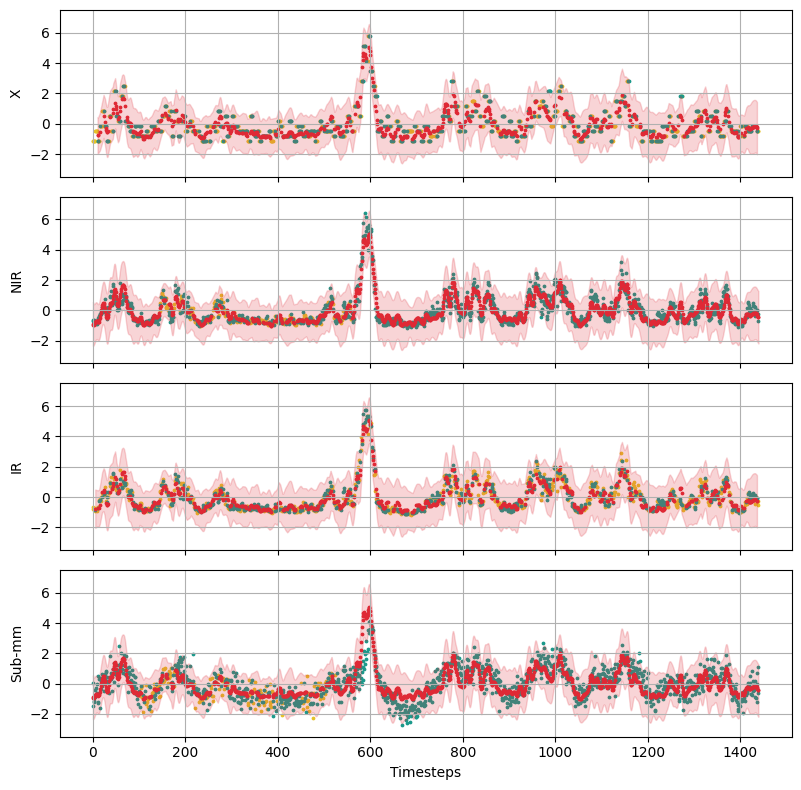

In [6]:
import torch
import matplotlib.pyplot as plt
from evaluator import Evaluator
from trainer import Trainer
from utils import *

data = get_dataset('sgra')
keys = ["X", 'NIR', "IR", "Sub-mm"]
num_keys = len(keys)
iterations = 1000
max_early_stop = 30

# Select a specific sample index
sample_idx = 150
sample = data[sample_idx]

# Process the data
train_x, train_idx, train_y, test_x, test_y, test_idx = process_data(sample, keys)

# Train the model
full_train_x = torch.cat(train_x)
full_train_idx = torch.cat(train_idx)
full_train_y = torch.cat(train_y)

trainer = Trainer(full_train_x, full_train_idx, full_train_y, 'gaussian', iterations=iterations, max_early_stop=max_early_stop)
model, likelihood = trainer.train_model()

evaluator = Evaluator(model, likelihood, test_x, test_idx, len(keys))
observed_preds = evaluator.evaluate()

# Create a plot for each key (wavelength)
fig, axes = plt.subplots(len(keys), 1, figsize=(8, 2 * len(keys)), sharex=True)

if len(keys) == 1:
    axes = [axes]  # Ensure axes is iterable for a single subplot

for i, key in enumerate(keys):
    train_xi = train_x[i].detach().numpy()
    train_yi = train_y[i].detach().numpy()
    test_xi = test_x[i].detach().numpy()
    test_yi = test_y[i].detach().numpy()

    means = observed_preds[i].mean.cpu().detach().numpy()
    lower, upper = observed_preds[i].confidence_region()
    lower, upper = lower.cpu().detach().numpy(), upper.cpu().detach().numpy()

    # Use ax_plot function to visualize the sample
    ax_plot(axes[i], train_yi, train_xi, test_yi, test_xi, means, lower, upper, label=key)

axes[-1].set_xlabel("Timesteps")
plt.tight_layout()
plt.show()


### Save Plotting Data for Main Analysis

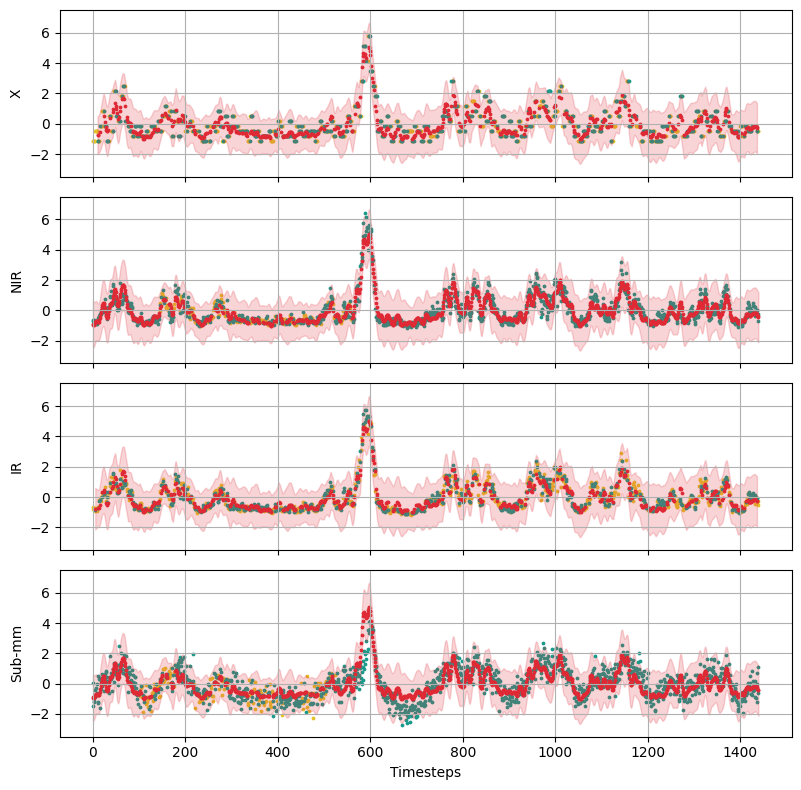

Results saved to model_results.npz


In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from evaluator import Evaluator
from trainer import Trainer
from utils import *

data = get_dataset('sgra')
keys = ["X", 'NIR', "IR", "Sub-mm"]
num_keys = len(keys)
iterations = 1000
max_early_stop = 30

# Select a specific sample index
sample_idx = 150
sample = data[sample_idx]

# Process the data
train_x, train_idx, train_y, test_x, test_y, test_idx = process_data(sample, keys)

# Train the model
full_train_x = torch.cat(train_x)
full_train_idx = torch.cat(train_idx)
full_train_y = torch.cat(train_y)

trainer = Trainer(full_train_x, full_train_idx, full_train_y, 'gaussian', iterations=iterations, max_early_stop=max_early_stop)
model, likelihood = trainer.train_model()

evaluator = Evaluator(model, likelihood, test_x, test_idx, len(keys))
observed_preds = evaluator.evaluate()

# Prepare data for saving
saved_data = {}

# Create a plot for each key (wavelength)
fig, axes = plt.subplots(len(keys), 1, figsize=(8, 2 * len(keys)), sharex=True)

if len(keys) == 1:
    axes = [axes]  # Ensure axes is iterable for a single subplot

for i, key in enumerate(keys):
    train_xi = train_x[i].detach().numpy()
    train_yi = train_y[i].detach().numpy()
    test_xi = test_x[i].detach().numpy()
    test_yi = test_y[i].detach().numpy()

    means = observed_preds[i].mean.cpu().detach().numpy()
    lower, upper = observed_preds[i].confidence_region()
    lower, upper = lower.cpu().detach().numpy(), upper.cpu().detach().numpy()

    # Save results for this wavelength
    saved_data[f"{key}_train_x"] = train_xi
    saved_data[f"{key}_train_y"] = train_yi
    saved_data[f"{key}_test_x"] = test_xi
    saved_data[f"{key}_test_y"] = test_yi
    saved_data[f"{key}_predicted_means"] = means
    saved_data[f"{key}_lower_bound"] = lower
    saved_data[f"{key}_upper_bound"] = upper

    # Use ax_plot function to visualize the sample
    ax_plot(axes[i], train_yi, train_xi, test_yi, test_xi, means, lower, upper, label=key)

axes[-1].set_xlabel("Timesteps")
plt.tight_layout()
plt.show()

# Save data to a file
output_file = "model_results.npz"
np.savez(output_file, **saved_data)

print(f"Results saved to {output_file}")


## Real Data

### Coverage Test

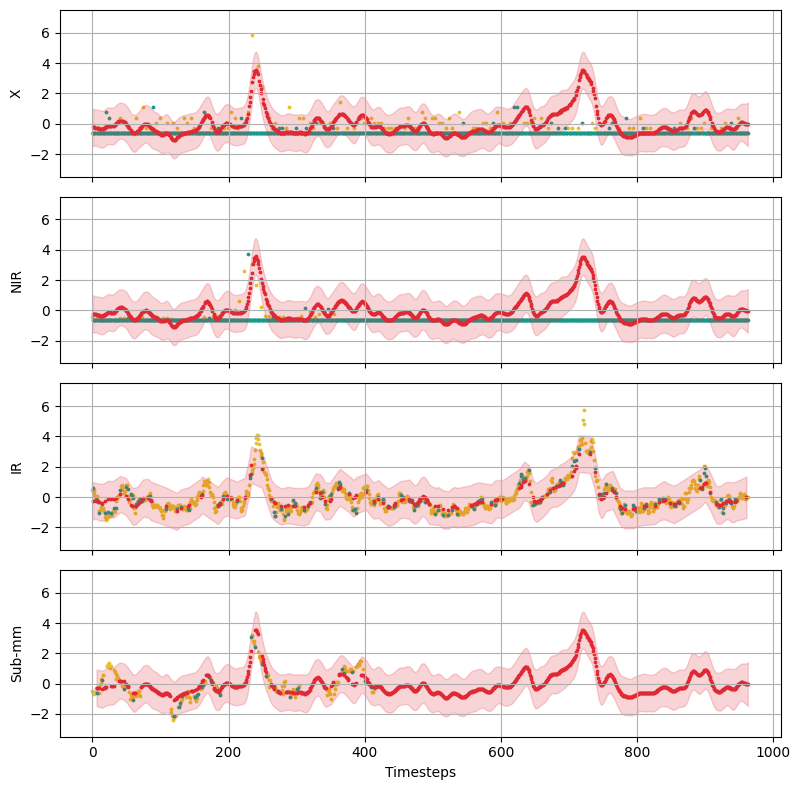

Results saved to coverage_test.npz


In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from evaluator import Evaluator
from trainer import Trainer
from utils import ax_plot

def process_real_data_for_mogp(real_data, keys):
    """
    Processes real data for MOGP model input.
    """
    dim = len(keys)
    sample = torch.tensor(real_data[0], dtype=torch.float32)

    train_x = []
    train_y = []
    train_idx = []
    test_x = []
    test_y = []
    test_idx = []

    for i in range(dim):
        train_xi = torch.where((sample[:, dim + i].int() == 1))[0].long()
        train_yi = sample[:, i][train_xi].float()
        train_idx_i = torch.zeros_like(train_xi, dtype=torch.long)

        test_xi = torch.where((sample[:, dim + i].int() == 0))[0].long()
        test_yi = sample[:, i][test_xi].float()
        test_idx_i = torch.zeros_like(test_xi, dtype=torch.long)

        train_x.append(train_xi.float())
        train_y.append(train_yi)
        train_idx.append(train_idx_i)

        test_x.append(test_xi.float())
        test_y.append(test_yi)
        test_idx.append(test_idx_i)

    return train_x, train_idx, train_y, test_x, test_y, test_idx

def run_mogp_on_real_data(real_data, keys, output_file="coverage_test.npz"):
    """
    Runs MOGP on the real data, plots the results, and saves them to a file.
    """
    train_x, train_idx, train_y, test_x, test_y, test_idx = process_real_data_for_mogp(real_data, keys)

    # Train the model
    full_train_x = torch.cat(train_x)
    full_train_idx = torch.cat(train_idx)
    full_train_y = torch.cat(train_y)

    trainer = Trainer(full_train_x, full_train_idx, full_train_y, 'gaussian', iterations=1000, max_early_stop=30)
    model, likelihood = trainer.train_model()

    evaluator = Evaluator(model, likelihood, test_x, test_idx, len(keys))
    observed_preds = evaluator.evaluate()

    # Create a plot for each key (wavelength)
    fig, axes = plt.subplots(len(keys), 1, figsize=(8, 2 * len(keys)), sharex=True)

    if len(keys) == 1:
        axes = [axes]

    saved_data = {}  # Dictionary to store results

    for i, key in enumerate(keys):
        train_xi = train_x[i].detach().numpy()
        train_yi = train_y[i].detach().numpy()
        test_xi = test_x[i].detach().numpy()
        test_yi = test_y[i].detach().numpy()

        means = observed_preds[i].mean.cpu().detach().numpy()
        lower, upper = observed_preds[i].confidence_region()
        lower, upper = lower.cpu().detach().numpy(), upper.cpu().detach().numpy()

        # Save results for this wavelength
        saved_data[f"{key}_train_x"] = train_xi
        saved_data[f"{key}_train_y"] = train_yi
        saved_data[f"{key}_test_x"] = test_xi
        saved_data[f"{key}_test_y"] = test_yi
        saved_data[f"{key}_predicted_means"] = means
        saved_data[f"{key}_lower_bound"] = lower
        saved_data[f"{key}_upper_bound"] = upper

        # Use ax_plot function to visualize the sample
        ax_plot(axes[i], train_yi, train_xi, test_yi, test_xi, means, lower, upper, label=key)

    axes[-1].set_xlabel("Timesteps")
    plt.tight_layout()
    plt.show()

    # Save data to a file
    np.savez(output_file, **saved_data)

    print(f"Results saved to {output_file}")

# Example Usage (assuming 'real_data' is your real data array):
real_data = np.load('../Analysis/coverage_test_data_mogp.npz')['real_data']
run_mogp_on_real_data(real_data, ["X", 'NIR', "IR", "Sub-mm"])

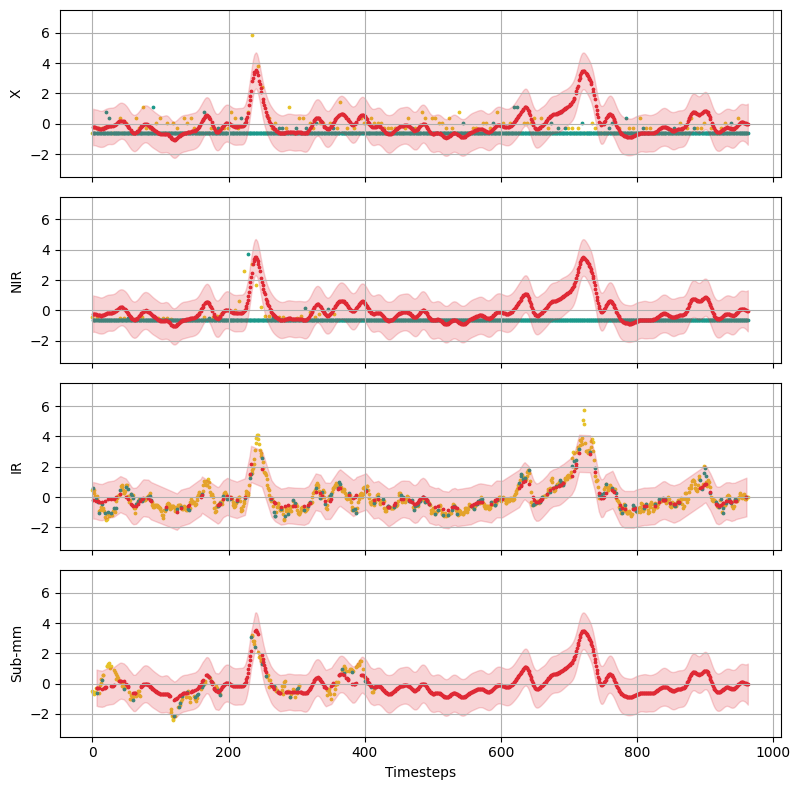

Results saved to coverage_test2.npz


In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from evaluator import Evaluator
from trainer import Trainer
from utils import ax_plot

def process_real_data_for_mogp(real_data, keys):
    """
    Processes real data for MOGP model input.
    """
    dim = len(keys)
    sample = torch.tensor(real_data[0], dtype=torch.float32)

    train_x = []
    train_y = []
    train_idx = []
    test_x = []
    test_y = []
    test_idx = []

    for i in range(dim):
        train_xi = torch.where((sample[:, dim + i].int() == 1))[0].long()
        train_yi = sample[:, i][train_xi].float()
        train_idx_i = torch.zeros_like(train_xi, dtype=torch.long)

        test_xi = torch.where((sample[:, dim + i].int() == 0))[0].long()
        test_yi = sample[:, i][test_xi].float()
        test_idx_i = torch.zeros_like(test_xi, dtype=torch.long)

        train_x.append(train_xi.float())
        train_y.append(train_yi)
        train_idx.append(train_idx_i)

        test_x.append(test_xi.float())
        test_y.append(test_yi)
        test_idx.append(test_idx_i)

    return train_x, train_idx, train_y, test_x, test_y, test_idx

def run_mogp_on_real_data(real_data, keys, output_file="coverage_test2.npz"):
    """
    Runs MOGP on the real data, plots the results, and saves them to a file.
    """
    train_x, train_idx, train_y, test_x, test_y, test_idx = process_real_data_for_mogp(real_data, keys)

    # Train the model
    full_train_x = torch.cat(train_x)
    full_train_idx = torch.cat(train_idx)
    full_train_y = torch.cat(train_y)

    trainer = Trainer(full_train_x, full_train_idx, full_train_y, 'gaussian', iterations=1000, max_early_stop=30)
    model, likelihood = trainer.train_model()

    evaluator = Evaluator(model, likelihood, test_x, test_idx, len(keys))
    observed_preds = evaluator.evaluate()

    # Create a plot for each key (wavelength)
    fig, axes = plt.subplots(len(keys), 1, figsize=(8, 2 * len(keys)), sharex=True)

    if len(keys) == 1:
        axes = [axes]

    saved_data = {}  # Dictionary to store results

    for i, key in enumerate(keys):
        train_xi = train_x[i].detach().numpy()
        train_yi = train_y[i].detach().numpy()
        test_xi = test_x[i].detach().numpy()
        test_yi = test_y[i].detach().numpy()

        means = observed_preds[i].mean.cpu().detach().numpy()
        lower, upper = observed_preds[i].confidence_region()
        lower, upper = lower.cpu().detach().numpy(), upper.cpu().detach().numpy()

        # Save results for this wavelength
        saved_data[f"{key}_train_x"] = train_xi
        saved_data[f"{key}_train_y"] = train_yi
        saved_data[f"{key}_test_x"] = test_xi
        saved_data[f"{key}_test_y"] = test_yi
        saved_data[f"{key}_predicted_means"] = means
        saved_data[f"{key}_lower_bound"] = lower
        saved_data[f"{key}_upper_bound"] = upper

        # Use ax_plot function to visualize the sample
        ax_plot(axes[i], train_yi, train_xi, test_yi, test_xi, means, lower, upper, label=key)

    axes[-1].set_xlabel("Timesteps")
    plt.tight_layout()
    plt.show()

    # Save data to a file
    np.savez(output_file, **saved_data)

    print(f"Results saved to {output_file}")

# Example Usage (assuming 'real_data' is your real data array):
real_data = np.load('../Analysis/coverage_test_data2_mogp.npz')['real_data']
run_mogp_on_real_data(real_data, ["X", 'NIR', "IR", "Sub-mm"])

### Full Interpolation

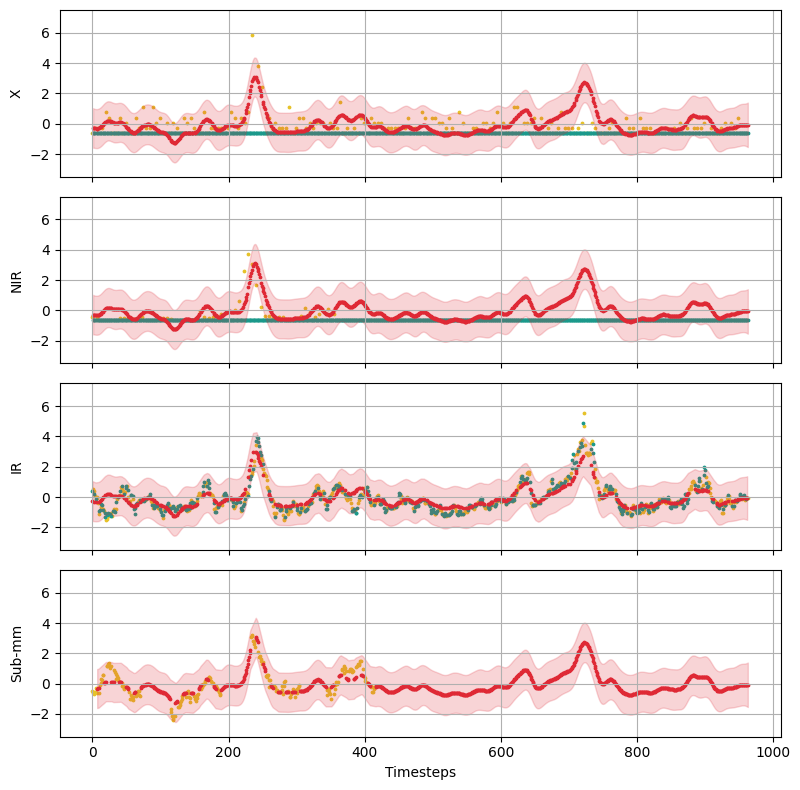

Results saved to real_results.npz


In [12]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from evaluator import Evaluator
from trainer import Trainer
from utils import ax_plot

def process_real_data_for_mogp(real_data, keys):
    """
    Processes real data for MOGP model input.
    """
    dim = len(keys)
    sample = torch.tensor(real_data[0], dtype=torch.float32)

    train_x = []
    train_y = []
    train_idx = []
    test_x = []
    test_y = []
    test_idx = []

    for i in range(dim):
        train_xi = torch.where((sample[:, dim + i].int() == 1))[0].long()
        train_yi = sample[:, i][train_xi].float()
        train_idx_i = torch.zeros_like(train_xi, dtype=torch.long)

        test_xi = torch.where((sample[:, dim + i].int() == 0))[0].long()
        test_yi = sample[:, i][test_xi].float()
        test_idx_i = torch.zeros_like(test_xi, dtype=torch.long)

        train_x.append(train_xi.float())
        train_y.append(train_yi)
        train_idx.append(train_idx_i)

        test_x.append(test_xi.float())
        test_y.append(test_yi)
        test_idx.append(test_idx_i)

    return train_x, train_idx, train_y, test_x, test_y, test_idx

def run_mogp_on_real_data(real_data, keys, output_file="real_results.npz"):
    """
    Runs MOGP on the real data, plots the results, and saves them to a file.
    """
    train_x, train_idx, train_y, test_x, test_y, test_idx = process_real_data_for_mogp(real_data, keys)

    # Train the model
    full_train_x = torch.cat(train_x)
    full_train_idx = torch.cat(train_idx)
    full_train_y = torch.cat(train_y)

    trainer = Trainer(full_train_x, full_train_idx, full_train_y, 'gaussian', iterations=1000, max_early_stop=30)
    model, likelihood = trainer.train_model()

    evaluator = Evaluator(model, likelihood, test_x, test_idx, len(keys))
    observed_preds = evaluator.evaluate()

    # Create a plot for each key (wavelength)
    fig, axes = plt.subplots(len(keys), 1, figsize=(8, 2 * len(keys)), sharex=True)

    if len(keys) == 1:
        axes = [axes]

    saved_data = {}  # Dictionary to store results

    for i, key in enumerate(keys):
        train_xi = train_x[i].detach().numpy()
        train_yi = train_y[i].detach().numpy()
        test_xi = test_x[i].detach().numpy()
        test_yi = test_y[i].detach().numpy()

        means = observed_preds[i].mean.cpu().detach().numpy()
        lower, upper = observed_preds[i].confidence_region()
        lower, upper = lower.cpu().detach().numpy(), upper.cpu().detach().numpy()

        # Save results for this wavelength
        saved_data[f"{key}_train_x"] = train_xi
        saved_data[f"{key}_train_y"] = train_yi
        saved_data[f"{key}_test_x"] = test_xi
        saved_data[f"{key}_test_y"] = test_yi
        saved_data[f"{key}_predicted_means"] = means
        saved_data[f"{key}_lower_bound"] = lower
        saved_data[f"{key}_upper_bound"] = upper

        # Use ax_plot function to visualize the sample
        ax_plot(axes[i], train_yi, train_xi, test_yi, test_xi, means, lower, upper, label=key)

    axes[-1].set_xlabel("Timesteps")
    plt.tight_layout()
    plt.show()

    # Save data to a file
    np.savez(output_file, **saved_data)

    print(f"Results saved to {output_file}")

# Example Usage (assuming 'real_data' is your real data array):
real_data = np.load('../Analysis/real_data_mogp.npz')['real_data']
run_mogp_on_real_data(real_data, ["X", 'NIR', "IR", "Sub-mm"])

# Noise Analysis

## 10% Noise

In [1]:
# import torch
# from matplotlib import pyplot as plt
# from utils import *
# from trainer import Trainer
# from evaluator import Evaluator
# from tqdm import tqdm
# import pandas as pd
# import psutil
# import os
# import gc

# def print_gpu_memory_usage(device=None):
#     if device is None:
#         device = torch.cuda.current_device()  # Get the current CUDA device
#     allocated_memory = torch.cuda.memory_allocated(device) / 1024 / 1024  # Convert to MB
#     cached_memory = torch.cuda.memory_reserved(device) / 1024 / 1024  # Convert to MB
#     print(f"GPU Memory Usage (Allocated): {allocated_memory:.2f} MB")
#     print(f"GPU Memory Usage (Cached): {cached_memory:.2f} MB")


# %matplotlib inline
# %load_ext autoreload
# %autoreload 2

# # Set up keys and other parameters
# data = get_dataset('10_noise')
# keys = ["X", 'NIR', "IR", "submm"]
# iterations = 1000
# max_early_stop = 30

# # Initialize variables to accumulate total MSE and CRPS across all samples and wavelengths
# total_mse_per_wavelength = {key: 0 for key in keys}
# total_crps_per_wavelength = {key: 0 for key in keys}
# total_mse_all = 0
# total_crps_all = 0
# num_samples = len(data)
# num_keys = len(keys)

# print(f'Dataset has {len(data)} samples')

# # Iterate over the dataset
# for idx, sample in enumerate(tqdm(data)):
#     # Process the data
#     train_x, train_idx, train_y, test_x, test_y, test_idx = process_data(sample, keys)
#     full_train_x = torch.cat(train_x)
#     full_train_idx = torch.cat(train_idx)
#     full_train_y = torch.cat(train_y)

#     # Train the model
#     trainer = Trainer(full_train_x, full_train_idx, full_train_y, 'gaussian', iterations=iterations, max_early_stop=max_early_stop)
#     model, likelihood = trainer.train_model()

#     evaluator = Evaluator(model, likelihood, test_x, test_idx, num_keys)
#     observed_preds = evaluator.evaluate()

#     # Process the results for each key
#     for i in range(num_keys):
#         # Convert to numpy
#         train_xi = train_x[i].detach().numpy()
#         train_yi = train_y[i].detach().numpy()
#         test_xi = test_x[i].detach().numpy()
#         test_yi = test_y[i].detach().numpy()

#         means = observed_preds[i].mean.cpu().detach().numpy()
#         lower, upper = observed_preds[i].confidence_region()
#         lower, upper = lower.detach().cpu().numpy(), upper.cpu().detach().numpy()
#         standard_deviations = (upper - means) / 2.0

#         # Calculate metrics
#         crps = crps_norm(test_yi, means, standard_deviations)
#         mse = mean_squared_error(test_yi, means)

#         # Accumulate total metrics for each wavelength
#         total_mse_per_wavelength[keys[i]] += mse
#         total_crps_per_wavelength[keys[i]] += crps

#         # Accumulate total metrics for the entire dataset
#         total_mse_all += mse
#         total_crps_all += crps
    
#     del train_x, train_y, train_idx, test_x, test_y, test_idx, trainer, evaluator, model, likelihood, observed_preds, lower, upper, standard_deviations, means, full_train_x, full_train_y, full_train_idx, train_xi, train_yi, test_xi, test_yi
#     torch.cuda.empty_cache()  # If using GPU
#     gc.collect()
    
#     # print_gpu_memory_usage()

# # Calculate averages for each wavelength
# average_mse_per_wavelength = {key: total_mse_per_wavelength[key] / num_samples for key in keys}
# average_crps_per_wavelength = {key: total_crps_per_wavelength[key] / num_samples for key in keys}

# # Calculate total averages for the entire dataset
# average_mse_all = total_mse_all / (num_samples * num_keys)
# average_crps_all = total_crps_all / (num_samples * num_keys)

# # Prepare the results in a dictionary format
# final_results = {
#     "wavelength": keys,
#     "average_mse": [average_mse_per_wavelength[key] for key in keys],
#     "average_crps": [average_crps_per_wavelength[key] for key in keys],
#     "total_average_mse": [average_mse_all] * len(keys),
#     "total_average_crps": [average_crps_all] * len(keys),
# }

# # Create a DataFrame from the results
# results_df = pd.DataFrame(final_results)

# # Save the results to a CSV file
# results_df.to_csv("10_noise.csv", index=False)

# print("Processing complete. Results saved to '10_noise.csv'.")
# print('Total MSE: ', [average_mse_all] * len(keys))

Dataset has 1635 samples


100%|██████████| 1635/1635 [1:33:09<00:00,  3.42s/it]

Processing complete. Results saved to '10_noise.csv'.
Total MSE:  [0.26443527353378066, 0.26443527353378066, 0.26443527353378066, 0.26443527353378066]


In [1]:
import torch
from matplotlib import pyplot as plt
from utils import *
from trainer import Trainer
from evaluator import Evaluator
from tqdm import tqdm
import pandas as pd
import psutil
import os
import gc


%matplotlib inline
%load_ext autoreload
%autoreload 2

# Set up keys and other parameters
filename = '10_noise'
data = get_dataset(filename)
keys = ["X", 'NIR', "IR", "submm"]
iterations = 1000
max_early_stop = 30

# 🚀 Instead of totals, store all values for later mean/std calculation
all_mse_per_wavelength = {key: [] for key in keys}
all_crps_per_wavelength = {key: [] for key in keys}
all_mse_all = []
all_crps_all = []

num_samples = len(data)
num_keys = len(keys)

print(f'Dataset has {len(data)} samples')

# Iterate over the dataset
for idx, sample in enumerate(tqdm(data)):
    # Process the data
    train_x, train_idx, train_y, test_x, test_y, test_idx = process_data(sample, keys)
    full_train_x = torch.cat(train_x)
    full_train_idx = torch.cat(train_idx)
    full_train_y = torch.cat(train_y)

    # Train the model
    trainer = Trainer(full_train_x, full_train_idx, full_train_y, 'gaussian', iterations=iterations, max_early_stop=max_early_stop)
    model, likelihood = trainer.train_model()

    evaluator = Evaluator(model, likelihood, test_x, test_idx, num_keys)
    observed_preds = evaluator.evaluate()

    # Process the results for each key
    for i in range(num_keys):
        # Convert to numpy
        test_yi = test_y[i].detach().numpy()
        means = observed_preds[i].mean.cpu().detach().numpy()
        lower, upper = observed_preds[i].confidence_region()
        lower, upper = lower.detach().cpu().numpy(), upper.detach().cpu().numpy()
        standard_deviations = (upper - means) / 2.0  # 2σ CI → std

        # Calculate metrics
        crps = crps_norm(test_yi, means, standard_deviations)
        mse = mean_squared_error(test_yi, means)

        # 🚀 Store metrics for later mean ± std
        all_mse_per_wavelength[keys[i]].append(mse)
        all_crps_per_wavelength[keys[i]].append(crps)
        all_mse_all.append(mse)
        all_crps_all.append(crps)
    
    # Cleanup
    del train_x, train_y, train_idx, test_x, test_y, test_idx, trainer, evaluator, model, likelihood, observed_preds, lower, upper, standard_deviations, means, full_train_x, full_train_y, full_train_idx
    torch.cuda.empty_cache()
    gc.collect()

# 🚀 Calculate averages and stds for each wavelength
average_mse_per_wavelength = {key: np.mean(all_mse_per_wavelength[key]) for key in keys}
std_mse_per_wavelength = {key: np.std(all_mse_per_wavelength[key]) for key in keys}

average_crps_per_wavelength = {key: np.mean(all_crps_per_wavelength[key]) for key in keys}
std_crps_per_wavelength = {key: np.std(all_crps_per_wavelength[key]) for key in keys}

# 🚀 Calculate total averages and stds
average_mse_all = np.mean(all_mse_all)
std_mse_all = np.std(all_mse_all)

average_crps_all = np.mean(all_crps_all)
std_crps_all = np.std(all_crps_all)

# Prepare the results in a dictionary format with mean ± std
final_results = {
    "wavelength": keys,
    "average_mse": [average_mse_per_wavelength[key] for key in keys],
    "std_mse": [std_mse_per_wavelength[key] for key in keys],
    "average_crps": [average_crps_per_wavelength[key] for key in keys],
    "std_crps": [std_crps_per_wavelength[key] for key in keys],
    "total_average_mse": [average_mse_all] * len(keys),
    "total_std_mse": [std_mse_all] * len(keys),
    "total_average_crps": [average_crps_all] * len(keys),
    "total_std_crps": [std_crps_all] * len(keys),
}

# Create a DataFrame from the results
results_df = pd.DataFrame(final_results)

# Save the results to a CSV file
results_df.to_csv(f"{filename}.csv", index=False)

print(f"Processing complete. Results with mean ± std saved to '{filename}.csv'.")

# Print MSE per wavelength with std
print("MSE per wavelength:")
for key in keys:
    print(f"{key}: {average_mse_per_wavelength[key]:.5f} ± {std_mse_per_wavelength[key]:.5f}")
print(f"Total MSE: {average_mse_all:.5f} ± {std_mse_all:.5f}\n")

# Print CRPS per wavelength with std
print("CRPS per wavelength:")
for key in keys:
    print(f"{key}: {average_crps_per_wavelength[key]:.5f} ± {std_crps_per_wavelength[key]:.5f}")
print(f"Total CRPS: {average_crps_all:.5f} ± {std_crps_all:.5f}\n")


Dataset has 1635 samples


100%|██████████| 1635/1635 [2:05:13<00:00,  4.60s/it] 

Processing complete. Results with mean ± std saved to '10_noise.csv'.
MSE per wavelength:
X: 0.16269 ± 0.07935
NIR: 0.11427 ± 0.04673
IR: 0.08777 ± 0.03697
submm: 0.69288 ± 0.28684
Total MSE: 0.26440 ± 0.29146

CRPS per wavelength:
X: 0.23203 ± 0.04580
NIR: 0.20744 ± 0.03284
IR: 0.19392 ± 0.03000
submm: 0.43981 ± 0.08452
Total CRPS: 0.26830 ± 0.11312



In [1]:
import torch
from matplotlib import pyplot as plt
from utils import *
from trainer import Trainer
from evaluator import Evaluator
from tqdm import tqdm
import pandas as pd
import psutil
import os
import gc


%matplotlib inline
%load_ext autoreload
%autoreload 2

# Set up keys and other parameters
filename = '10_burst'
data = get_dataset(filename)
keys = ["X", 'NIR', "IR", "submm"]
iterations = 1000
max_early_stop = 30

# 🚀 Instead of totals, store all values for later mean/std calculation
all_mse_per_wavelength = {key: [] for key in keys}
all_crps_per_wavelength = {key: [] for key in keys}
all_mse_all = []
all_crps_all = []

num_samples = len(data)
num_keys = len(keys)

print(f'Dataset has {len(data)} samples')

# Iterate over the dataset
for idx, sample in enumerate(tqdm(data)):
    # Process the data
    train_x, train_idx, train_y, test_x, test_y, test_idx = process_data(sample, keys)
    full_train_x = torch.cat(train_x)
    full_train_idx = torch.cat(train_idx)
    full_train_y = torch.cat(train_y)

    # Train the model
    trainer = Trainer(full_train_x, full_train_idx, full_train_y, 'gaussian', iterations=iterations, max_early_stop=max_early_stop)
    model, likelihood = trainer.train_model()

    evaluator = Evaluator(model, likelihood, test_x, test_idx, num_keys)
    observed_preds = evaluator.evaluate()

    # Process the results for each key
    for i in range(num_keys):
        # Convert to numpy
        test_yi = test_y[i].detach().numpy()
        means = observed_preds[i].mean.cpu().detach().numpy()
        lower, upper = observed_preds[i].confidence_region()
        lower, upper = lower.detach().cpu().numpy(), upper.detach().cpu().numpy()
        standard_deviations = (upper - means) / 2.0  # 2σ CI → std

        # Calculate metrics
        crps = crps_norm(test_yi, means, standard_deviations)
        mse = mean_squared_error(test_yi, means)

        # 🚀 Store metrics for later mean ± std
        all_mse_per_wavelength[keys[i]].append(mse)
        all_crps_per_wavelength[keys[i]].append(crps)
        all_mse_all.append(mse)
        all_crps_all.append(crps)
    
    # Cleanup
    del train_x, train_y, train_idx, test_x, test_y, test_idx, trainer, evaluator, model, likelihood, observed_preds, lower, upper, standard_deviations, means, full_train_x, full_train_y, full_train_idx
    torch.cuda.empty_cache()
    gc.collect()

# 🚀 Calculate averages and stds for each wavelength
average_mse_per_wavelength = {key: np.mean(all_mse_per_wavelength[key]) for key in keys}
std_mse_per_wavelength = {key: np.std(all_mse_per_wavelength[key]) for key in keys}

average_crps_per_wavelength = {key: np.mean(all_crps_per_wavelength[key]) for key in keys}
std_crps_per_wavelength = {key: np.std(all_crps_per_wavelength[key]) for key in keys}

# 🚀 Calculate total averages and stds
average_mse_all = np.mean(all_mse_all)
std_mse_all = np.std(all_mse_all)

average_crps_all = np.mean(all_crps_all)
std_crps_all = np.std(all_crps_all)

# Prepare the results in a dictionary format with mean ± std
final_results = {
    "wavelength": keys,
    "average_mse": [average_mse_per_wavelength[key] for key in keys],
    "std_mse": [std_mse_per_wavelength[key] for key in keys],
    "average_crps": [average_crps_per_wavelength[key] for key in keys],
    "std_crps": [std_crps_per_wavelength[key] for key in keys],
    "total_average_mse": [average_mse_all] * len(keys),
    "total_std_mse": [std_mse_all] * len(keys),
    "total_average_crps": [average_crps_all] * len(keys),
    "total_std_crps": [std_crps_all] * len(keys),
}

# Create a DataFrame from the results
results_df = pd.DataFrame(final_results)

# Save the results to a CSV file
results_df.to_csv(f"{filename}.csv", index=False)

print(f"Processing complete. Results with mean ± std saved to '{filename}.csv'.")

# Print MSE per wavelength with std
print("MSE per wavelength:")
for key in keys:
    print(f"{key}: {average_mse_per_wavelength[key]:.5f} ± {std_mse_per_wavelength[key]:.5f}")
print(f"Total MSE: {average_mse_all:.5f} ± {std_mse_all:.5f}\n")

# Print CRPS per wavelength with std
print("CRPS per wavelength:")
for key in keys:
    print(f"{key}: {average_crps_per_wavelength[key]:.5f} ± {std_crps_per_wavelength[key]:.5f}")
print(f"Total CRPS: {average_crps_all:.5f} ± {std_crps_all:.5f}\n")


Dataset has 1635 samples


100%|██████████| 1635/1635 [6:38:37<00:00, 14.63s/it]  

Processing complete. Results with mean ± std saved to '10_burst.csv'.
MSE per wavelength:
X: 0.28416 ± 0.25362
NIR: 0.19440 ± 0.21585
IR: 0.13697 ± 0.17482
submm: 0.74946 ± 0.84613
Total MSE: 0.34125 ± 0.52216

CRPS per wavelength:
X: 0.29236 ± 0.09916
NIR: 0.24880 ± 0.08479
IR: 0.22898 ± 0.07197
submm: 0.45153 ± 0.20618
Total CRPS: 0.30542 ± 0.15434



## 30% Noise

In [1]:
# import torch
# from matplotlib import pyplot as plt
# from utils import *
# from trainer import Trainer
# from evaluator import Evaluator
# from tqdm import tqdm
# import pandas as pd
# import psutil
# import os
# import gc

# def print_gpu_memory_usage(device=None):
#     if device is None:
#         device = torch.cuda.current_device()  # Get the current CUDA device
#     allocated_memory = torch.cuda.memory_allocated(device) / 1024 / 1024  # Convert to MB
#     cached_memory = torch.cuda.memory_reserved(device) / 1024 / 1024  # Convert to MB
#     print(f"GPU Memory Usage (Allocated): {allocated_memory:.2f} MB")
#     print(f"GPU Memory Usage (Cached): {cached_memory:.2f} MB")


# %matplotlib inline
# %load_ext autoreload
# %autoreload 2

# # Set up keys and other parameters
# data = get_dataset('30_noise')
# keys = ["X", 'NIR', "IR", "submm"]
# iterations = 1000
# max_early_stop = 30

# # Initialize variables to accumulate total MSE and CRPS across all samples and wavelengths
# total_mse_per_wavelength = {key: 0 for key in keys}
# total_crps_per_wavelength = {key: 0 for key in keys}
# total_mse_all = 0
# total_crps_all = 0
# num_samples = len(data)
# num_keys = len(keys)

# print(f'Dataset has {len(data)} samples')

# # Iterate over the dataset
# for idx, sample in enumerate(tqdm(data)):
#     # Process the data
#     train_x, train_idx, train_y, test_x, test_y, test_idx = process_data(sample, keys)
#     full_train_x = torch.cat(train_x)
#     full_train_idx = torch.cat(train_idx)
#     full_train_y = torch.cat(train_y)

#     # Train the model
#     trainer = Trainer(full_train_x, full_train_idx, full_train_y, 'gaussian', iterations=iterations, max_early_stop=max_early_stop)
#     model, likelihood = trainer.train_model()

#     evaluator = Evaluator(model, likelihood, test_x, test_idx, num_keys)
#     observed_preds = evaluator.evaluate()

#     # Process the results for each key
#     for i in range(num_keys):
#         # Convert to numpy
#         train_xi = train_x[i].detach().numpy()
#         train_yi = train_y[i].detach().numpy()
#         test_xi = test_x[i].detach().numpy()
#         test_yi = test_y[i].detach().numpy()

#         means = observed_preds[i].mean.cpu().detach().numpy()
#         lower, upper = observed_preds[i].confidence_region()
#         lower, upper = lower.detach().cpu().numpy(), upper.cpu().detach().numpy()
#         standard_deviations = (upper - means) / 2.0

#         # Calculate metrics
#         crps = crps_norm(test_yi, means, standard_deviations)
#         mse = mean_squared_error(test_yi, means)

#         # Accumulate total metrics for each wavelength
#         total_mse_per_wavelength[keys[i]] += mse
#         total_crps_per_wavelength[keys[i]] += crps

#         # Accumulate total metrics for the entire dataset
#         total_mse_all += mse
#         total_crps_all += crps
    
#     del train_x, train_y, train_idx, test_x, test_y, test_idx, trainer, evaluator, model, likelihood, observed_preds, lower, upper, standard_deviations, means, full_train_x, full_train_y, full_train_idx, train_xi, train_yi, test_xi, test_yi
#     torch.cuda.empty_cache()  # If using GPU
#     gc.collect()
    
#     # print_gpu_memory_usage()

# # Calculate averages for each wavelength
# average_mse_per_wavelength = {key: total_mse_per_wavelength[key] / num_samples for key in keys}
# average_crps_per_wavelength = {key: total_crps_per_wavelength[key] / num_samples for key in keys}

# # Calculate total averages for the entire dataset
# average_mse_all = total_mse_all / (num_samples * num_keys)
# average_crps_all = total_crps_all / (num_samples * num_keys)

# # Prepare the results in a dictionary format
# final_results = {
#     "wavelength": keys,
#     "average_mse": [average_mse_per_wavelength[key] for key in keys],
#     "average_crps": [average_crps_per_wavelength[key] for key in keys],
#     "total_average_mse": [average_mse_all] * len(keys),
#     "total_average_crps": [average_crps_all] * len(keys),
# }

# # Create a DataFrame from the results
# results_df = pd.DataFrame(final_results)

# # Save the results to a CSV file
# results_df.to_csv("30_noise.csv", index=False)

# print("Processing complete. Results saved to '30_noise.csv'.")
# print('Total MSE: ', [average_mse_all] * len(keys))

Dataset has 1635 samples


100%|██████████| 1635/1635 [56:02<00:00,  2.06s/it] 

Processing complete. Results saved to '30_noise.csv'.
Total MSE:  [0.26798977897288395, 0.26798977897288395, 0.26798977897288395, 0.26798977897288395]


In [2]:
import torch
from matplotlib import pyplot as plt
from utils import *
from trainer import Trainer
from evaluator import Evaluator
from tqdm import tqdm
import pandas as pd
import psutil
import os
import gc


%matplotlib inline
%load_ext autoreload
%autoreload 2

# Set up keys and other parameters
filename = '30_noise'
data = get_dataset(filename)
keys = ["X", 'NIR', "IR", "submm"]
iterations = 1000
max_early_stop = 30

# 🚀 Instead of totals, store all values for later mean/std calculation
all_mse_per_wavelength = {key: [] for key in keys}
all_crps_per_wavelength = {key: [] for key in keys}
all_mse_all = []
all_crps_all = []

num_samples = len(data)
num_keys = len(keys)

print(f'Dataset has {len(data)} samples')

# Iterate over the dataset
for idx, sample in enumerate(tqdm(data)):
    # Process the data
    train_x, train_idx, train_y, test_x, test_y, test_idx = process_data(sample, keys)
    full_train_x = torch.cat(train_x)
    full_train_idx = torch.cat(train_idx)
    full_train_y = torch.cat(train_y)

    # Train the model
    trainer = Trainer(full_train_x, full_train_idx, full_train_y, 'gaussian', iterations=iterations, max_early_stop=max_early_stop)
    model, likelihood = trainer.train_model()

    evaluator = Evaluator(model, likelihood, test_x, test_idx, num_keys)
    observed_preds = evaluator.evaluate()

    # Process the results for each key
    for i in range(num_keys):
        # Convert to numpy
        test_yi = test_y[i].detach().numpy()
        means = observed_preds[i].mean.cpu().detach().numpy()
        lower, upper = observed_preds[i].confidence_region()
        lower, upper = lower.detach().cpu().numpy(), upper.detach().cpu().numpy()
        standard_deviations = (upper - means) / 2.0  # 2σ CI → std

        # Calculate metrics
        crps = crps_norm(test_yi, means, standard_deviations)
        mse = mean_squared_error(test_yi, means)

        # 🚀 Store metrics for later mean ± std
        all_mse_per_wavelength[keys[i]].append(mse)
        all_crps_per_wavelength[keys[i]].append(crps)
        all_mse_all.append(mse)
        all_crps_all.append(crps)
    
    # Cleanup
    del train_x, train_y, train_idx, test_x, test_y, test_idx, trainer, evaluator, model, likelihood, observed_preds, lower, upper, standard_deviations, means, full_train_x, full_train_y, full_train_idx
    torch.cuda.empty_cache()
    gc.collect()

# 🚀 Calculate averages and stds for each wavelength
average_mse_per_wavelength = {key: np.mean(all_mse_per_wavelength[key]) for key in keys}
std_mse_per_wavelength = {key: np.std(all_mse_per_wavelength[key]) for key in keys}

average_crps_per_wavelength = {key: np.mean(all_crps_per_wavelength[key]) for key in keys}
std_crps_per_wavelength = {key: np.std(all_crps_per_wavelength[key]) for key in keys}

# 🚀 Calculate total averages and stds
average_mse_all = np.mean(all_mse_all)
std_mse_all = np.std(all_mse_all)

average_crps_all = np.mean(all_crps_all)
std_crps_all = np.std(all_crps_all)

# Prepare the results in a dictionary format with mean ± std
final_results = {
    "wavelength": keys,
    "average_mse": [average_mse_per_wavelength[key] for key in keys],
    "std_mse": [std_mse_per_wavelength[key] for key in keys],
    "average_crps": [average_crps_per_wavelength[key] for key in keys],
    "std_crps": [std_crps_per_wavelength[key] for key in keys],
    "total_average_mse": [average_mse_all] * len(keys),
    "total_std_mse": [std_mse_all] * len(keys),
    "total_average_crps": [average_crps_all] * len(keys),
    "total_std_crps": [std_crps_all] * len(keys),
}

# Create a DataFrame from the results
results_df = pd.DataFrame(final_results)

# Save the results to a CSV file
results_df.to_csv(f"{filename}.csv", index=False)

print(f"Processing complete. Results with mean ± std saved to '{filename}.csv'.")

# Print MSE per wavelength with std
print("MSE per wavelength:")
for key in keys:
    print(f"{key}: {average_mse_per_wavelength[key]:.5f} ± {std_mse_per_wavelength[key]:.5f}")
print(f"Total MSE: {average_mse_all:.5f} ± {std_mse_all:.5f}\n")

# Print CRPS per wavelength with std
print("CRPS per wavelength:")
for key in keys:
    print(f"{key}: {average_crps_per_wavelength[key]:.5f} ± {std_crps_per_wavelength[key]:.5f}")
print(f"Total CRPS: {average_crps_all:.5f} ± {std_crps_all:.5f}\n")


Dataset has 1635 samples


100%|██████████| 1635/1635 [54:13<00:00,  1.99s/it] 

Processing complete. Results with mean ± std saved to '30_noise.csv'.
MSE per wavelength:
X: 0.17327 ± 0.08401
NIR: 0.11798 ± 0.04823
IR: 0.09421 ± 0.04100
submm: 0.68636 ± 0.27986
Total MSE: 0.26795 ± 0.28552

CRPS per wavelength:
X: 0.23531 ± 0.04800
NIR: 0.20673 ± 0.03377
IR: 0.19494 ± 0.03183
submm: 0.43869 ± 0.08352
Total CRPS: 0.26892 ± 0.11261



In [2]:
import torch
from matplotlib import pyplot as plt
from utils import *
from trainer import Trainer
from evaluator import Evaluator
from tqdm import tqdm
import pandas as pd
import psutil
import os
import gc


%matplotlib inline
%load_ext autoreload
%autoreload 2

# Set up keys and other parameters
filename = '30_burst'
data = get_dataset(filename)
keys = ["X", 'NIR', "IR", "submm"]
iterations = 1000
max_early_stop = 30

# 🚀 Instead of totals, store all values for later mean/std calculation
all_mse_per_wavelength = {key: [] for key in keys}
all_crps_per_wavelength = {key: [] for key in keys}
all_mse_all = []
all_crps_all = []

num_samples = len(data)
num_keys = len(keys)

print(f'Dataset has {len(data)} samples')

# Iterate over the dataset
for idx, sample in enumerate(tqdm(data)):
    # Process the data
    train_x, train_idx, train_y, test_x, test_y, test_idx = process_data(sample, keys)
    full_train_x = torch.cat(train_x)
    full_train_idx = torch.cat(train_idx)
    full_train_y = torch.cat(train_y)

    # Train the model
    trainer = Trainer(full_train_x, full_train_idx, full_train_y, 'gaussian', iterations=iterations, max_early_stop=max_early_stop)
    model, likelihood = trainer.train_model()

    evaluator = Evaluator(model, likelihood, test_x, test_idx, num_keys)
    observed_preds = evaluator.evaluate()

    # Process the results for each key
    for i in range(num_keys):
        # Convert to numpy
        test_yi = test_y[i].detach().numpy()
        means = observed_preds[i].mean.cpu().detach().numpy()
        lower, upper = observed_preds[i].confidence_region()
        lower, upper = lower.detach().cpu().numpy(), upper.detach().cpu().numpy()
        standard_deviations = (upper - means) / 2.0  # 2σ CI → std

        # Calculate metrics
        crps = crps_norm(test_yi, means, standard_deviations)
        mse = mean_squared_error(test_yi, means)

        # 🚀 Store metrics for later mean ± std
        all_mse_per_wavelength[keys[i]].append(mse)
        all_crps_per_wavelength[keys[i]].append(crps)
        all_mse_all.append(mse)
        all_crps_all.append(crps)
    
    # Cleanup
    del train_x, train_y, train_idx, test_x, test_y, test_idx, trainer, evaluator, model, likelihood, observed_preds, lower, upper, standard_deviations, means, full_train_x, full_train_y, full_train_idx
    torch.cuda.empty_cache()
    gc.collect()

# 🚀 Calculate averages and stds for each wavelength
average_mse_per_wavelength = {key: np.mean(all_mse_per_wavelength[key]) for key in keys}
std_mse_per_wavelength = {key: np.std(all_mse_per_wavelength[key]) for key in keys}

average_crps_per_wavelength = {key: np.mean(all_crps_per_wavelength[key]) for key in keys}
std_crps_per_wavelength = {key: np.std(all_crps_per_wavelength[key]) for key in keys}

# 🚀 Calculate total averages and stds
average_mse_all = np.mean(all_mse_all)
std_mse_all = np.std(all_mse_all)

average_crps_all = np.mean(all_crps_all)
std_crps_all = np.std(all_crps_all)

# Prepare the results in a dictionary format with mean ± std
final_results = {
    "wavelength": keys,
    "average_mse": [average_mse_per_wavelength[key] for key in keys],
    "std_mse": [std_mse_per_wavelength[key] for key in keys],
    "average_crps": [average_crps_per_wavelength[key] for key in keys],
    "std_crps": [std_crps_per_wavelength[key] for key in keys],
    "total_average_mse": [average_mse_all] * len(keys),
    "total_std_mse": [std_mse_all] * len(keys),
    "total_average_crps": [average_crps_all] * len(keys),
    "total_std_crps": [std_crps_all] * len(keys),
}

# Create a DataFrame from the results
results_df = pd.DataFrame(final_results)

# Save the results to a CSV file
results_df.to_csv(f"{filename}.csv", index=False)

print(f"Processing complete. Results with mean ± std saved to '{filename}.csv'.")

# Print MSE per wavelength with std
print("MSE per wavelength:")
for key in keys:
    print(f"{key}: {average_mse_per_wavelength[key]:.5f} ± {std_mse_per_wavelength[key]:.5f}")
print(f"Total MSE: {average_mse_all:.5f} ± {std_mse_all:.5f}\n")

# Print CRPS per wavelength with std
print("CRPS per wavelength:")
for key in keys:
    print(f"{key}: {average_crps_per_wavelength[key]:.5f} ± {std_crps_per_wavelength[key]:.5f}")
print(f"Total CRPS: {average_crps_all:.5f} ± {std_crps_all:.5f}\n")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Dataset has 1635 samples


100%|██████████| 1635/1635 [4:50:14<00:00, 10.65s/it]  

Processing complete. Results with mean ± std saved to '30_burst.csv'.
MSE per wavelength:
X: 0.29224 ± 0.16999
NIR: 0.12517 ± 0.08514
IR: 0.13816 ± 0.09586
submm: 0.74212 ± 0.50648
Total MSE: 0.32442 ± 0.37141

CRPS per wavelength:
X: 0.29389 ± 0.07062
NIR: 0.21944 ± 0.04093
IR: 0.21219 ± 0.04917
submm: 0.44967 ± 0.12831
Total CRPS: 0.29380 ± 0.12453



## 50% Noise

In [3]:
# import torch
# from matplotlib import pyplot as plt
# from utils import *
# from trainer import Trainer
# from evaluator import Evaluator
# from tqdm import tqdm
# import pandas as pd
# import psutil
# import os
# import gc

# def print_gpu_memory_usage(device=None):
#     if device is None:
#         device = torch.cuda.current_device()  # Get the current CUDA device
#     allocated_memory = torch.cuda.memory_allocated(device) / 1024 / 1024  # Convert to MB
#     cached_memory = torch.cuda.memory_reserved(device) / 1024 / 1024  # Convert to MB
#     print(f"GPU Memory Usage (Allocated): {allocated_memory:.2f} MB")
#     print(f"GPU Memory Usage (Cached): {cached_memory:.2f} MB")


# %matplotlib inline
# %load_ext autoreload
# %autoreload 2

# # Set up keys and other parameters
# data = get_dataset('50_noise')
# keys = ["X", 'NIR', "IR", "submm"]
# iterations = 1000
# max_early_stop = 30

# # Initialize variables to accumulate total MSE and CRPS across all samples and wavelengths
# total_mse_per_wavelength = {key: 0 for key in keys}
# total_crps_per_wavelength = {key: 0 for key in keys}
# total_mse_all = 0
# total_crps_all = 0
# num_samples = len(data)
# num_keys = len(keys)

# print(f'Dataset has {len(data)} samples')

# # Iterate over the dataset
# for idx, sample in enumerate(tqdm(data)):
#     # Process the data
#     train_x, train_idx, train_y, test_x, test_y, test_idx = process_data(sample, keys)
#     full_train_x = torch.cat(train_x)
#     full_train_idx = torch.cat(train_idx)
#     full_train_y = torch.cat(train_y)

#     # Train the model
#     trainer = Trainer(full_train_x, full_train_idx, full_train_y, 'gaussian', iterations=iterations, max_early_stop=max_early_stop)
#     model, likelihood = trainer.train_model()

#     evaluator = Evaluator(model, likelihood, test_x, test_idx, num_keys)
#     observed_preds = evaluator.evaluate()

#     # Process the results for each key
#     for i in range(num_keys):
#         # Convert to numpy
#         train_xi = train_x[i].detach().numpy()
#         train_yi = train_y[i].detach().numpy()
#         test_xi = test_x[i].detach().numpy()
#         test_yi = test_y[i].detach().numpy()

#         means = observed_preds[i].mean.cpu().detach().numpy()
#         lower, upper = observed_preds[i].confidence_region()
#         lower, upper = lower.detach().cpu().numpy(), upper.cpu().detach().numpy()
#         standard_deviations = (upper - means) / 2.0

#         # Calculate metrics
#         crps = crps_norm(test_yi, means, standard_deviations)
#         mse = mean_squared_error(test_yi, means)

#         # Accumulate total metrics for each wavelength
#         total_mse_per_wavelength[keys[i]] += mse
#         total_crps_per_wavelength[keys[i]] += crps

#         # Accumulate total metrics for the entire dataset
#         total_mse_all += mse
#         total_crps_all += crps
    
#     del train_x, train_y, train_idx, test_x, test_y, test_idx, trainer, evaluator, model, likelihood, observed_preds, lower, upper, standard_deviations, means, full_train_x, full_train_y, full_train_idx, train_xi, train_yi, test_xi, test_yi
#     torch.cuda.empty_cache()  # If using GPU
#     gc.collect()
    
#     # print_gpu_memory_usage()

# # Calculate averages for each wavelength
# average_mse_per_wavelength = {key: total_mse_per_wavelength[key] / num_samples for key in keys}
# average_crps_per_wavelength = {key: total_crps_per_wavelength[key] / num_samples for key in keys}

# # Calculate total averages for the entire dataset
# average_mse_all = total_mse_all / (num_samples * num_keys)
# average_crps_all = total_crps_all / (num_samples * num_keys)

# # Prepare the results in a dictionary format
# final_results = {
#     "wavelength": keys,
#     "average_mse": [average_mse_per_wavelength[key] for key in keys],
#     "average_crps": [average_crps_per_wavelength[key] for key in keys],
#     "total_average_mse": [average_mse_all] * len(keys),
#     "total_average_crps": [average_crps_all] * len(keys),
# }

# # Create a DataFrame from the results
# results_df = pd.DataFrame(final_results)

# # Save the results to a CSV file
# results_df.to_csv("50_noise.csv", index=False)

# print("Processing complete. Results saved to '50_noise.csv'.")
# print('Total MSE: ', [average_mse_all] * len(keys))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Dataset has 1635 samples


100%|██████████| 1635/1635 [43:11<00:00,  1.59s/it]

Processing complete. Results saved to '50_noise.csv'.
Total MSE:  [0.27343127432905145, 0.27343127432905145, 0.27343127432905145, 0.27343127432905145]


In [3]:
import torch
from matplotlib import pyplot as plt
from utils import *
from trainer import Trainer
from evaluator import Evaluator
from tqdm import tqdm
import pandas as pd
import psutil
import os
import gc


%matplotlib inline
%load_ext autoreload
%autoreload 2

# Set up keys and other parameters
filename = '50_noise'
data = get_dataset(filename)
keys = ["X", 'NIR', "IR", "submm"]
iterations = 1000
max_early_stop = 30

# 🚀 Instead of totals, store all values for later mean/std calculation
all_mse_per_wavelength = {key: [] for key in keys}
all_crps_per_wavelength = {key: [] for key in keys}
all_mse_all = []
all_crps_all = []

num_samples = len(data)
num_keys = len(keys)

print(f'Dataset has {len(data)} samples')

# Iterate over the dataset
for idx, sample in enumerate(tqdm(data)):
    # Process the data
    train_x, train_idx, train_y, test_x, test_y, test_idx = process_data(sample, keys)
    full_train_x = torch.cat(train_x)
    full_train_idx = torch.cat(train_idx)
    full_train_y = torch.cat(train_y)

    # Train the model
    trainer = Trainer(full_train_x, full_train_idx, full_train_y, 'gaussian', iterations=iterations, max_early_stop=max_early_stop)
    model, likelihood = trainer.train_model()

    evaluator = Evaluator(model, likelihood, test_x, test_idx, num_keys)
    observed_preds = evaluator.evaluate()

    # Process the results for each key
    for i in range(num_keys):
        # Convert to numpy
        test_yi = test_y[i].detach().numpy()
        means = observed_preds[i].mean.cpu().detach().numpy()
        lower, upper = observed_preds[i].confidence_region()
        lower, upper = lower.detach().cpu().numpy(), upper.detach().cpu().numpy()
        standard_deviations = (upper - means) / 2.0  # 2σ CI → std

        # Calculate metrics
        crps = crps_norm(test_yi, means, standard_deviations)
        mse = mean_squared_error(test_yi, means)

        # 🚀 Store metrics for later mean ± std
        all_mse_per_wavelength[keys[i]].append(mse)
        all_crps_per_wavelength[keys[i]].append(crps)
        all_mse_all.append(mse)
        all_crps_all.append(crps)
    
    # Cleanup
    del train_x, train_y, train_idx, test_x, test_y, test_idx, trainer, evaluator, model, likelihood, observed_preds, lower, upper, standard_deviations, means, full_train_x, full_train_y, full_train_idx
    torch.cuda.empty_cache()
    gc.collect()

# 🚀 Calculate averages and stds for each wavelength
average_mse_per_wavelength = {key: np.mean(all_mse_per_wavelength[key]) for key in keys}
std_mse_per_wavelength = {key: np.std(all_mse_per_wavelength[key]) for key in keys}

average_crps_per_wavelength = {key: np.mean(all_crps_per_wavelength[key]) for key in keys}
std_crps_per_wavelength = {key: np.std(all_crps_per_wavelength[key]) for key in keys}

# 🚀 Calculate total averages and stds
average_mse_all = np.mean(all_mse_all)
std_mse_all = np.std(all_mse_all)

average_crps_all = np.mean(all_crps_all)
std_crps_all = np.std(all_crps_all)

# Prepare the results in a dictionary format with mean ± std
final_results = {
    "wavelength": keys,
    "average_mse": [average_mse_per_wavelength[key] for key in keys],
    "std_mse": [std_mse_per_wavelength[key] for key in keys],
    "average_crps": [average_crps_per_wavelength[key] for key in keys],
    "std_crps": [std_crps_per_wavelength[key] for key in keys],
    "total_average_mse": [average_mse_all] * len(keys),
    "total_std_mse": [std_mse_all] * len(keys),
    "total_average_crps": [average_crps_all] * len(keys),
    "total_std_crps": [std_crps_all] * len(keys),
}

# Create a DataFrame from the results
results_df = pd.DataFrame(final_results)

# Save the results to a CSV file
results_df.to_csv(f"{filename}.csv", index=False)

print(f"Processing complete. Results with mean ± std saved to '{filename}.csv'.")

# Print MSE per wavelength with std
print("MSE per wavelength:")
for key in keys:
    print(f"{key}: {average_mse_per_wavelength[key]:.5f} ± {std_mse_per_wavelength[key]:.5f}")
print(f"Total MSE: {average_mse_all:.5f} ± {std_mse_all:.5f}\n")

# Print CRPS per wavelength with std
print("CRPS per wavelength:")
for key in keys:
    print(f"{key}: {average_crps_per_wavelength[key]:.5f} ± {std_crps_per_wavelength[key]:.5f}")
print(f"Total CRPS: {average_crps_all:.5f} ± {std_crps_all:.5f}\n")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Dataset has 1635 samples


100%|██████████| 1635/1635 [58:59<00:00,  2.16s/it] 

Processing complete. Results with mean ± std saved to '50_noise.csv'.
MSE per wavelength:
X: 0.18527 ± 0.08975
NIR: 0.12512 ± 0.05130
IR: 0.10171 ± 0.04409
submm: 0.68150 ± 0.27386
Total MSE: 0.27340 ± 0.27991

CRPS per wavelength:
X: 0.23772 ± 0.05099
NIR: 0.20609 ± 0.03614
IR: 0.19525 ± 0.03456
submm: 0.43923 ± 0.08333
Total CRPS: 0.26957 ± 0.11335



In [3]:
import torch
from matplotlib import pyplot as plt
from utils import *
from trainer import Trainer
from evaluator import Evaluator
from tqdm import tqdm
import pandas as pd
import psutil
import os
import gc


%matplotlib inline
%load_ext autoreload
%autoreload 2

# Set up keys and other parameters
filename = '50_burst'
data = get_dataset(filename)
keys = ["X", 'NIR', "IR", "submm"]
iterations = 1000
max_early_stop = 30

# 🚀 Instead of totals, store all values for later mean/std calculation
all_mse_per_wavelength = {key: [] for key in keys}
all_crps_per_wavelength = {key: [] for key in keys}
all_mse_all = []
all_crps_all = []

num_samples = len(data)
num_keys = len(keys)

print(f'Dataset has {len(data)} samples')

# Iterate over the dataset
for idx, sample in enumerate(tqdm(data)):
    # Process the data
    train_x, train_idx, train_y, test_x, test_y, test_idx = process_data(sample, keys)
    full_train_x = torch.cat(train_x)
    full_train_idx = torch.cat(train_idx)
    full_train_y = torch.cat(train_y)

    # Train the model
    trainer = Trainer(full_train_x, full_train_idx, full_train_y, 'gaussian', iterations=iterations, max_early_stop=max_early_stop)
    model, likelihood = trainer.train_model()

    evaluator = Evaluator(model, likelihood, test_x, test_idx, num_keys)
    observed_preds = evaluator.evaluate()

    # Process the results for each key
    for i in range(num_keys):
        # Convert to numpy
        test_yi = test_y[i].detach().numpy()
        means = observed_preds[i].mean.cpu().detach().numpy()
        lower, upper = observed_preds[i].confidence_region()
        lower, upper = lower.detach().cpu().numpy(), upper.detach().cpu().numpy()
        standard_deviations = (upper - means) / 2.0  # 2σ CI → std

        # Calculate metrics
        crps = crps_norm(test_yi, means, standard_deviations)
        mse = mean_squared_error(test_yi, means)

        # 🚀 Store metrics for later mean ± std
        all_mse_per_wavelength[keys[i]].append(mse)
        all_crps_per_wavelength[keys[i]].append(crps)
        all_mse_all.append(mse)
        all_crps_all.append(crps)
    
    # Cleanup
    del train_x, train_y, train_idx, test_x, test_y, test_idx, trainer, evaluator, model, likelihood, observed_preds, lower, upper, standard_deviations, means, full_train_x, full_train_y, full_train_idx
    torch.cuda.empty_cache()
    gc.collect()

# 🚀 Calculate averages and stds for each wavelength
average_mse_per_wavelength = {key: np.mean(all_mse_per_wavelength[key]) for key in keys}
std_mse_per_wavelength = {key: np.std(all_mse_per_wavelength[key]) for key in keys}

average_crps_per_wavelength = {key: np.mean(all_crps_per_wavelength[key]) for key in keys}
std_crps_per_wavelength = {key: np.std(all_crps_per_wavelength[key]) for key in keys}

# 🚀 Calculate total averages and stds
average_mse_all = np.mean(all_mse_all)
std_mse_all = np.std(all_mse_all)

average_crps_all = np.mean(all_crps_all)
std_crps_all = np.std(all_crps_all)

# Prepare the results in a dictionary format with mean ± std
final_results = {
    "wavelength": keys,
    "average_mse": [average_mse_per_wavelength[key] for key in keys],
    "std_mse": [std_mse_per_wavelength[key] for key in keys],
    "average_crps": [average_crps_per_wavelength[key] for key in keys],
    "std_crps": [std_crps_per_wavelength[key] for key in keys],
    "total_average_mse": [average_mse_all] * len(keys),
    "total_std_mse": [std_mse_all] * len(keys),
    "total_average_crps": [average_crps_all] * len(keys),
    "total_std_crps": [std_crps_all] * len(keys),
}

# Create a DataFrame from the results
results_df = pd.DataFrame(final_results)

# Save the results to a CSV file
results_df.to_csv(f"{filename}.csv", index=False)

print(f"Processing complete. Results with mean ± std saved to '{filename}.csv'.")

# Print MSE per wavelength with std
print("MSE per wavelength:")
for key in keys:
    print(f"{key}: {average_mse_per_wavelength[key]:.5f} ± {std_mse_per_wavelength[key]:.5f}")
print(f"Total MSE: {average_mse_all:.5f} ± {std_mse_all:.5f}\n")

# Print CRPS per wavelength with std
print("CRPS per wavelength:")
for key in keys:
    print(f"{key}: {average_crps_per_wavelength[key]:.5f} ± {std_crps_per_wavelength[key]:.5f}")
print(f"Total CRPS: {average_crps_all:.5f} ± {std_crps_all:.5f}\n")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Dataset has 1635 samples


100%|██████████| 1635/1635 [3:27:59<00:00,  7.63s/it]  

Processing complete. Results with mean ± std saved to '50_burst.csv'.
MSE per wavelength:
X: 0.67757 ± 0.42721
NIR: 0.66569 ± 0.38315
IR: 0.61697 ± 0.37159
submm: 0.91060 ± 0.29609
Total MSE: 0.71770 ± 0.38947

CRPS per wavelength:
X: 0.39742 ± 0.08904
NIR: 0.38910 ± 0.07612
IR: 0.37986 ± 0.07550
submm: 0.52277 ± 0.07983
Total CRPS: 0.42229 ± 0.09926



## 70% Noise

In [5]:
# import torch
# from matplotlib import pyplot as plt
# from utils import *
# from trainer import Trainer
# from evaluator import Evaluator
# from tqdm import tqdm
# import pandas as pd
# import psutil
# import os
# import gc

# def print_gpu_memory_usage(device=None):
#     if device is None:
#         device = torch.cuda.current_device()  # Get the current CUDA device
#     allocated_memory = torch.cuda.memory_allocated(device) / 1024 / 1024  # Convert to MB
#     cached_memory = torch.cuda.memory_reserved(device) / 1024 / 1024  # Convert to MB
#     print(f"GPU Memory Usage (Allocated): {allocated_memory:.2f} MB")
#     print(f"GPU Memory Usage (Cached): {cached_memory:.2f} MB")


# %matplotlib inline
# %load_ext autoreload
# %autoreload 2

# # Set up keys and other parameters
# data = get_dataset('70_noise')
# keys = ["X", 'NIR', "IR", "submm"]
# iterations = 1000
# max_early_stop = 30

# # Initialize variables to accumulate total MSE and CRPS across all samples and wavelengths
# total_mse_per_wavelength = {key: 0 for key in keys}
# total_crps_per_wavelength = {key: 0 for key in keys}
# total_mse_all = 0
# total_crps_all = 0
# num_samples = len(data)
# num_keys = len(keys)

# print(f'Dataset has {len(data)} samples')

# # Iterate over the dataset
# for idx, sample in enumerate(tqdm(data)):
#     # Process the data
#     train_x, train_idx, train_y, test_x, test_y, test_idx = process_data(sample, keys)
#     full_train_x = torch.cat(train_x)
#     full_train_idx = torch.cat(train_idx)
#     full_train_y = torch.cat(train_y)

#     # Train the model
#     trainer = Trainer(full_train_x, full_train_idx, full_train_y, 'gaussian', iterations=iterations, max_early_stop=max_early_stop)
#     model, likelihood = trainer.train_model()

#     evaluator = Evaluator(model, likelihood, test_x, test_idx, num_keys)
#     observed_preds = evaluator.evaluate()

#     # Process the results for each key
#     for i in range(num_keys):
#         # Convert to numpy
#         train_xi = train_x[i].detach().numpy()
#         train_yi = train_y[i].detach().numpy()
#         test_xi = test_x[i].detach().numpy()
#         test_yi = test_y[i].detach().numpy()

#         means = observed_preds[i].mean.cpu().detach().numpy()
#         lower, upper = observed_preds[i].confidence_region()
#         lower, upper = lower.detach().cpu().numpy(), upper.cpu().detach().numpy()
#         standard_deviations = (upper - means) / 2.0

#         # Calculate metrics
#         crps = crps_norm(test_yi, means, standard_deviations)
#         mse = mean_squared_error(test_yi, means)

#         # Accumulate total metrics for each wavelength
#         total_mse_per_wavelength[keys[i]] += mse
#         total_crps_per_wavelength[keys[i]] += crps

#         # Accumulate total metrics for the entire dataset
#         total_mse_all += mse
#         total_crps_all += crps
    
#     del train_x, train_y, train_idx, test_x, test_y, test_idx, trainer, evaluator, model, likelihood, observed_preds, lower, upper, standard_deviations, means, full_train_x, full_train_y, full_train_idx, train_xi, train_yi, test_xi, test_yi
#     torch.cuda.empty_cache()  # If using GPU
#     gc.collect()
    
#     # print_gpu_memory_usage()

# # Calculate averages for each wavelength
# average_mse_per_wavelength = {key: total_mse_per_wavelength[key] / num_samples for key in keys}
# average_crps_per_wavelength = {key: total_crps_per_wavelength[key] / num_samples for key in keys}

# # Calculate total averages for the entire dataset
# average_mse_all = total_mse_all / (num_samples * num_keys)
# average_crps_all = total_crps_all / (num_samples * num_keys)

# # Prepare the results in a dictionary format
# final_results = {
#     "wavelength": keys,
#     "average_mse": [average_mse_per_wavelength[key] for key in keys],
#     "average_crps": [average_crps_per_wavelength[key] for key in keys],
#     "total_average_mse": [average_mse_all] * len(keys),
#     "total_average_crps": [average_crps_all] * len(keys),
# }

# # Create a DataFrame from the results
# results_df = pd.DataFrame(final_results)

# # Save the results to a CSV file
# results_df.to_csv("70_noise.csv", index=False)

# print("Processing complete. Results saved to '70_noise.csv'.")
# print('Total MSE: ', [average_mse_all] * len(keys))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Dataset has 1635 samples


100%|██████████| 1635/1635 [1:30:27<00:00,  3.32s/it]

Processing complete. Results saved to '70_noise.csv'.
Total MSE:  [0.2850363925449267, 0.2850363925449267, 0.2850363925449267, 0.2850363925449267]


In [4]:
import torch
from matplotlib import pyplot as plt
from utils import *
from trainer import Trainer
from evaluator import Evaluator
from tqdm import tqdm
import pandas as pd
import psutil
import os
import gc


%matplotlib inline
%load_ext autoreload
%autoreload 2

# Set up keys and other parameters
filename = '70_noise'
data = get_dataset(filename)
keys = ["X", 'NIR', "IR", "submm"]
iterations = 1000
max_early_stop = 30

# 🚀 Instead of totals, store all values for later mean/std calculation
all_mse_per_wavelength = {key: [] for key in keys}
all_crps_per_wavelength = {key: [] for key in keys}
all_mse_all = []
all_crps_all = []

num_samples = len(data)
num_keys = len(keys)

print(f'Dataset has {len(data)} samples')

# Iterate over the dataset
for idx, sample in enumerate(tqdm(data)):
    # Process the data
    train_x, train_idx, train_y, test_x, test_y, test_idx = process_data(sample, keys)
    full_train_x = torch.cat(train_x)
    full_train_idx = torch.cat(train_idx)
    full_train_y = torch.cat(train_y)

    # Train the model
    trainer = Trainer(full_train_x, full_train_idx, full_train_y, 'gaussian', iterations=iterations, max_early_stop=max_early_stop)
    model, likelihood = trainer.train_model()

    evaluator = Evaluator(model, likelihood, test_x, test_idx, num_keys)
    observed_preds = evaluator.evaluate()

    # Process the results for each key
    for i in range(num_keys):
        # Convert to numpy
        test_yi = test_y[i].detach().numpy()
        means = observed_preds[i].mean.cpu().detach().numpy()
        lower, upper = observed_preds[i].confidence_region()
        lower, upper = lower.detach().cpu().numpy(), upper.detach().cpu().numpy()
        standard_deviations = (upper - means) / 2.0  # 2σ CI → std

        # Calculate metrics
        crps = crps_norm(test_yi, means, standard_deviations)
        mse = mean_squared_error(test_yi, means)

        # 🚀 Store metrics for later mean ± std
        all_mse_per_wavelength[keys[i]].append(mse)
        all_crps_per_wavelength[keys[i]].append(crps)
        all_mse_all.append(mse)
        all_crps_all.append(crps)
    
    # Cleanup
    del train_x, train_y, train_idx, test_x, test_y, test_idx, trainer, evaluator, model, likelihood, observed_preds, lower, upper, standard_deviations, means, full_train_x, full_train_y, full_train_idx
    torch.cuda.empty_cache()
    gc.collect()

# 🚀 Calculate averages and stds for each wavelength
average_mse_per_wavelength = {key: np.mean(all_mse_per_wavelength[key]) for key in keys}
std_mse_per_wavelength = {key: np.std(all_mse_per_wavelength[key]) for key in keys}

average_crps_per_wavelength = {key: np.mean(all_crps_per_wavelength[key]) for key in keys}
std_crps_per_wavelength = {key: np.std(all_crps_per_wavelength[key]) for key in keys}

# 🚀 Calculate total averages and stds
average_mse_all = np.mean(all_mse_all)
std_mse_all = np.std(all_mse_all)

average_crps_all = np.mean(all_crps_all)
std_crps_all = np.std(all_crps_all)

# Prepare the results in a dictionary format with mean ± std
final_results = {
    "wavelength": keys,
    "average_mse": [average_mse_per_wavelength[key] for key in keys],
    "std_mse": [std_mse_per_wavelength[key] for key in keys],
    "average_crps": [average_crps_per_wavelength[key] for key in keys],
    "std_crps": [std_crps_per_wavelength[key] for key in keys],
    "total_average_mse": [average_mse_all] * len(keys),
    "total_std_mse": [std_mse_all] * len(keys),
    "total_average_crps": [average_crps_all] * len(keys),
    "total_std_crps": [std_crps_all] * len(keys),
}

# Create a DataFrame from the results
results_df = pd.DataFrame(final_results)

# Save the results to a CSV file
results_df.to_csv(f"{filename}.csv", index=False)

print(f"Processing complete. Results with mean ± std saved to '{filename}.csv'.")

# Print MSE per wavelength with std
print("MSE per wavelength:")
for key in keys:
    print(f"{key}: {average_mse_per_wavelength[key]:.5f} ± {std_mse_per_wavelength[key]:.5f}")
print(f"Total MSE: {average_mse_all:.5f} ± {std_mse_all:.5f}\n")

# Print CRPS per wavelength with std
print("CRPS per wavelength:")
for key in keys:
    print(f"{key}: {average_crps_per_wavelength[key]:.5f} ± {std_crps_per_wavelength[key]:.5f}")
print(f"Total CRPS: {average_crps_all:.5f} ± {std_crps_all:.5f}\n")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Dataset has 1635 samples


100%|██████████| 1635/1635 [1:49:57<00:00,  4.04s/it]

Processing complete. Results with mean ± std saved to '70_noise.csv'.
MSE per wavelength:
X: 0.21429 ± 0.10680
NIR: 0.14680 ± 0.05866
IR: 0.11575 ± 0.04874
submm: 0.66332 ± 0.27004
Total MSE: 0.28504 ± 0.26740

CRPS per wavelength:
X: 0.23759 ± 0.06149
NIR: 0.19748 ± 0.03929
IR: 0.18158 ± 0.03642
submm: 0.44583 ± 0.08901
Total CRPS: 0.26562 ± 0.12201



In [1]:
import torch
from matplotlib import pyplot as plt
from utils import *
from trainer import Trainer
from evaluator import Evaluator
from tqdm import tqdm
import pandas as pd
import psutil
import os
import gc


%matplotlib inline
%load_ext autoreload
%autoreload 2

# Set up keys and other parameters
filename = '70_burst'
data = get_dataset(filename)
keys = ["X", 'NIR', "IR", "submm"]
iterations = 1000
max_early_stop = 30

# 🚀 Instead of totals, store all values for later mean/std calculation
all_mse_per_wavelength = {key: [] for key in keys}
all_crps_per_wavelength = {key: [] for key in keys}
all_mse_all = []
all_crps_all = []

num_samples = len(data)
num_keys = len(keys)

print(f'Dataset has {len(data)} samples')

# Iterate over the dataset
for idx, sample in enumerate(tqdm(data)):
    # Process the data
    train_x, train_idx, train_y, test_x, test_y, test_idx = process_data(sample, keys)
    full_train_x = torch.cat(train_x)
    full_train_idx = torch.cat(train_idx)
    full_train_y = torch.cat(train_y)

    # Train the model
    trainer = Trainer(full_train_x, full_train_idx, full_train_y, 'gaussian', iterations=iterations, max_early_stop=max_early_stop)
    model, likelihood = trainer.train_model()

    evaluator = Evaluator(model, likelihood, test_x, test_idx, num_keys)
    observed_preds = evaluator.evaluate()

    # Process the results for each key
    for i in range(num_keys):
        # Convert to numpy
        test_yi = test_y[i].detach().numpy()
        means = observed_preds[i].mean.cpu().detach().numpy()
        lower, upper = observed_preds[i].confidence_region()
        lower, upper = lower.detach().cpu().numpy(), upper.detach().cpu().numpy()
        standard_deviations = (upper - means) / 2.0  # 2σ CI → std

        # Calculate metrics
        crps = crps_norm(test_yi, means, standard_deviations)
        mse = mean_squared_error(test_yi, means)

        # 🚀 Store metrics for later mean ± std
        all_mse_per_wavelength[keys[i]].append(mse)
        all_crps_per_wavelength[keys[i]].append(crps)
        all_mse_all.append(mse)
        all_crps_all.append(crps)
    
    # Cleanup
    del train_x, train_y, train_idx, test_x, test_y, test_idx, trainer, evaluator, model, likelihood, observed_preds, lower, upper, standard_deviations, means, full_train_x, full_train_y, full_train_idx
    torch.cuda.empty_cache()
    gc.collect()

# 🚀 Calculate averages and stds for each wavelength
average_mse_per_wavelength = {key: np.mean(all_mse_per_wavelength[key]) for key in keys}
std_mse_per_wavelength = {key: np.std(all_mse_per_wavelength[key]) for key in keys}

average_crps_per_wavelength = {key: np.mean(all_crps_per_wavelength[key]) for key in keys}
std_crps_per_wavelength = {key: np.std(all_crps_per_wavelength[key]) for key in keys}

# 🚀 Calculate total averages and stds
average_mse_all = np.mean(all_mse_all)
std_mse_all = np.std(all_mse_all)

average_crps_all = np.mean(all_crps_all)
std_crps_all = np.std(all_crps_all)

# Prepare the results in a dictionary format with mean ± std
final_results = {
    "wavelength": keys,
    "average_mse": [average_mse_per_wavelength[key] for key in keys],
    "std_mse": [std_mse_per_wavelength[key] for key in keys],
    "average_crps": [average_crps_per_wavelength[key] for key in keys],
    "std_crps": [std_crps_per_wavelength[key] for key in keys],
    "total_average_mse": [average_mse_all] * len(keys),
    "total_std_mse": [std_mse_all] * len(keys),
    "total_average_crps": [average_crps_all] * len(keys),
    "total_std_crps": [std_crps_all] * len(keys),
}

# Create a DataFrame from the results
results_df = pd.DataFrame(final_results)

# Save the results to a CSV file
results_df.to_csv(f"{filename}.csv", index=False)

print(f"Processing complete. Results with mean ± std saved to '{filename}.csv'.")

# Print MSE per wavelength with std
print("MSE per wavelength:")
for key in keys:
    print(f"{key}: {average_mse_per_wavelength[key]:.5f} ± {std_mse_per_wavelength[key]:.5f}")
print(f"Total MSE: {average_mse_all:.5f} ± {std_mse_all:.5f}\n")

# Print CRPS per wavelength with std
print("CRPS per wavelength:")
for key in keys:
    print(f"{key}: {average_crps_per_wavelength[key]:.5f} ± {std_crps_per_wavelength[key]:.5f}")
print(f"Total CRPS: {average_crps_all:.5f} ± {std_crps_all:.5f}\n")


Dataset has 1635 samples


100%|██████████| 1635/1635 [1:00:01<00:00,  2.20s/it]

Processing complete. Results with mean ± std saved to '70_burst.csv'.
MSE per wavelength:
X: 0.88533 ± 0.34428
NIR: 0.87869 ± 0.31020
IR: 0.85818 ± 0.30529
submm: 0.98924 ± 0.19551
Total MSE: 0.90286 ± 0.29855

CRPS per wavelength:
X: 0.45078 ± 0.06795
NIR: 0.45154 ± 0.05714
IR: 0.45258 ± 0.06035
submm: 0.56057 ± 0.05976
Total CRPS: 0.47887 ± 0.07746



## 90% Noise

In [5]:
# import torch
# from matplotlib import pyplot as plt
# from utils import *
# from trainer import Trainer
# from evaluator import Evaluator
# from tqdm import tqdm
# import pandas as pd
# import psutil
# import os
# import gc

# def print_gpu_memory_usage(device=None):
#     if device is None:
#         device = torch.cuda.current_device()  # Get the current CUDA device
#     allocated_memory = torch.cuda.memory_allocated(device) / 1024 / 1024  # Convert to MB
#     cached_memory = torch.cuda.memory_reserved(device) / 1024 / 1024  # Convert to MB
#     print(f"GPU Memory Usage (Allocated): {allocated_memory:.2f} MB")
#     print(f"GPU Memory Usage (Cached): {cached_memory:.2f} MB")


# %matplotlib inline
# %load_ext autoreload
# %autoreload 2

# # Set up keys and other parameters
# data = get_dataset('90_noise')
# keys = ["X", 'NIR', "IR", "submm"]
# iterations = 1000
# max_early_stop = 30

# # Initialize variables to accumulate total MSE and CRPS across all samples and wavelengths
# total_mse_per_wavelength = {key: 0 for key in keys}
# total_crps_per_wavelength = {key: 0 for key in keys}
# total_mse_all = 0
# total_crps_all = 0
# num_samples = len(data)
# num_keys = len(keys)

# print(f'Dataset has {len(data)} samples')

# # Iterate over the dataset
# for idx, sample in enumerate(tqdm(data)):
#     # Process the data
#     train_x, train_idx, train_y, test_x, test_y, test_idx = process_data(sample, keys)
#     full_train_x = torch.cat(train_x)
#     full_train_idx = torch.cat(train_idx)
#     full_train_y = torch.cat(train_y)

#     # Train the model
#     trainer = Trainer(full_train_x, full_train_idx, full_train_y, 'gaussian', iterations=iterations, max_early_stop=max_early_stop)
#     model, likelihood = trainer.train_model()

#     evaluator = Evaluator(model, likelihood, test_x, test_idx, num_keys)
#     observed_preds = evaluator.evaluate()

#     # Process the results for each key
#     for i in range(num_keys):
#         # Convert to numpy
#         train_xi = train_x[i].detach().numpy()
#         train_yi = train_y[i].detach().numpy()
#         test_xi = test_x[i].detach().numpy()
#         test_yi = test_y[i].detach().numpy()

#         means = observed_preds[i].mean.cpu().detach().numpy()
#         lower, upper = observed_preds[i].confidence_region()
#         lower, upper = lower.detach().cpu().numpy(), upper.cpu().detach().numpy()
#         standard_deviations = (upper - means) / 2.0

#         # Calculate metrics
#         crps = crps_norm(test_yi, means, standard_deviations)
#         mse = mean_squared_error(test_yi, means)

#         # Accumulate total metrics for each wavelength
#         total_mse_per_wavelength[keys[i]] += mse
#         total_crps_per_wavelength[keys[i]] += crps

#         # Accumulate total metrics for the entire dataset
#         total_mse_all += mse
#         total_crps_all += crps
    
#     del train_x, train_y, train_idx, test_x, test_y, test_idx, trainer, evaluator, model, likelihood, observed_preds, lower, upper, standard_deviations, means, full_train_x, full_train_y, full_train_idx, train_xi, train_yi, test_xi, test_yi
#     torch.cuda.empty_cache()  # If using GPU
#     gc.collect()
    
#     # print_gpu_memory_usage()

# # Calculate averages for each wavelength
# average_mse_per_wavelength = {key: total_mse_per_wavelength[key] / num_samples for key in keys}
# average_crps_per_wavelength = {key: total_crps_per_wavelength[key] / num_samples for key in keys}

# # Calculate total averages for the entire dataset
# average_mse_all = total_mse_all / (num_samples * num_keys)
# average_crps_all = total_crps_all / (num_samples * num_keys)

# # Prepare the results in a dictionary format
# final_results = {
#     "wavelength": keys,
#     "average_mse": [average_mse_per_wavelength[key] for key in keys],
#     "average_crps": [average_crps_per_wavelength[key] for key in keys],
#     "total_average_mse": [average_mse_all] * len(keys),
#     "total_average_crps": [average_crps_all] * len(keys),
# }

# # Create a DataFrame from the results
# results_df = pd.DataFrame(final_results)

# # Save the results to a CSV file
# results_df.to_csv("90_noise.csv", index=False)

# print("Processing complete. Results saved to '90_noise.csv'.")
# print('Total MSE: ', [average_mse_all] * len(keys))

In [6]:
import torch
from matplotlib import pyplot as plt
from utils import *
from trainer import Trainer
from evaluator import Evaluator
from tqdm import tqdm
import pandas as pd
import psutil
import os
import gc


%matplotlib inline
%load_ext autoreload
%autoreload 2

# Set up keys and other parameters
filename = '90_noise'
data = get_dataset(filename)
keys = ["X", 'NIR', "IR", "submm"]
iterations = 1000
max_early_stop = 30

# 🚀 Instead of totals, store all values for later mean/std calculation
all_mse_per_wavelength = {key: [] for key in keys}
all_crps_per_wavelength = {key: [] for key in keys}
all_mse_all = []
all_crps_all = []

num_samples = len(data)
num_keys = len(keys)

print(f'Dataset has {len(data)} samples')

# Iterate over the dataset
for idx, sample in enumerate(tqdm(data)):
    # Process the data
    train_x, train_idx, train_y, test_x, test_y, test_idx = process_data(sample, keys)
    full_train_x = torch.cat(train_x)
    full_train_idx = torch.cat(train_idx)
    full_train_y = torch.cat(train_y)

    # Train the model
    trainer = Trainer(full_train_x, full_train_idx, full_train_y, 'gaussian', iterations=iterations, max_early_stop=max_early_stop)
    model, likelihood = trainer.train_model()

    evaluator = Evaluator(model, likelihood, test_x, test_idx, num_keys)
    observed_preds = evaluator.evaluate()

    # Process the results for each key
    for i in range(num_keys):
        # Convert to numpy
        test_yi = test_y[i].detach().numpy()
        means = observed_preds[i].mean.cpu().detach().numpy()
        lower, upper = observed_preds[i].confidence_region()
        lower, upper = lower.detach().cpu().numpy(), upper.detach().cpu().numpy()
        standard_deviations = (upper - means) / 2.0  # 2σ CI → std

        # Calculate metrics
        crps = crps_norm(test_yi, means, standard_deviations)
        mse = mean_squared_error(test_yi, means)

        # 🚀 Store metrics for later mean ± std
        all_mse_per_wavelength[keys[i]].append(mse)
        all_crps_per_wavelength[keys[i]].append(crps)
        all_mse_all.append(mse)
        all_crps_all.append(crps)
    
    # Cleanup
    del train_x, train_y, train_idx, test_x, test_y, test_idx, trainer, evaluator, model, likelihood, observed_preds, lower, upper, standard_deviations, means, full_train_x, full_train_y, full_train_idx
    torch.cuda.empty_cache()
    gc.collect()

# 🚀 Calculate averages and stds for each wavelength
average_mse_per_wavelength = {key: np.mean(all_mse_per_wavelength[key]) for key in keys}
std_mse_per_wavelength = {key: np.std(all_mse_per_wavelength[key]) for key in keys}

average_crps_per_wavelength = {key: np.mean(all_crps_per_wavelength[key]) for key in keys}
std_crps_per_wavelength = {key: np.std(all_crps_per_wavelength[key]) for key in keys}

# 🚀 Calculate total averages and stds
average_mse_all = np.mean(all_mse_all)
std_mse_all = np.std(all_mse_all)

average_crps_all = np.mean(all_crps_all)
std_crps_all = np.std(all_crps_all)

# Prepare the results in a dictionary format with mean ± std
final_results = {
    "wavelength": keys,
    "average_mse": [average_mse_per_wavelength[key] for key in keys],
    "std_mse": [std_mse_per_wavelength[key] for key in keys],
    "average_crps": [average_crps_per_wavelength[key] for key in keys],
    "std_crps": [std_crps_per_wavelength[key] for key in keys],
    "total_average_mse": [average_mse_all] * len(keys),
    "total_std_mse": [std_mse_all] * len(keys),
    "total_average_crps": [average_crps_all] * len(keys),
    "total_std_crps": [std_crps_all] * len(keys),
}

# Create a DataFrame from the results
results_df = pd.DataFrame(final_results)

# Save the results to a CSV file
results_df.to_csv(f"{filename}.csv", index=False)

print(f"Processing complete. Results with mean ± std saved to '{filename}.csv'.")

# Print MSE per wavelength with std
print("MSE per wavelength:")
for key in keys:
    print(f"{key}: {average_mse_per_wavelength[key]:.5f} ± {std_mse_per_wavelength[key]:.5f}")
print(f"Total MSE: {average_mse_all:.5f} ± {std_mse_all:.5f}\n")

# Print CRPS per wavelength with std
print("CRPS per wavelength:")
for key in keys:
    print(f"{key}: {average_crps_per_wavelength[key]:.5f} ± {std_crps_per_wavelength[key]:.5f}")
print(f"Total CRPS: {average_crps_all:.5f} ± {std_crps_all:.5f}\n")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Dataset has 1635 samples


100%|██████████| 1635/1635 [1:24:55<00:00,  3.12s/it]

Processing complete. Results with mean ± std saved to '90_noise.csv'.
MSE per wavelength:
X: 0.29137 ± 0.13275
NIR: 0.23622 ± 0.09603
IR: 0.20238 ± 0.09001
submm: 0.68705 ± 0.25748
Total MSE: 0.35426 ± 0.25147

CRPS per wavelength:
X: 0.27260 ± 0.06501
NIR: 0.24262 ± 0.04793
IR: 0.22942 ± 0.04697
submm: 0.45468 ± 0.08193
Total CRPS: 0.29983 ± 0.10999



In [2]:
import torch
from matplotlib import pyplot as plt
from utils import *
from trainer import Trainer
from evaluator import Evaluator
from tqdm import tqdm
import pandas as pd
import psutil
import os
import gc


%matplotlib inline
%load_ext autoreload
%autoreload 2

# Set up keys and other parameters
filename = '90_burst'
data = get_dataset(filename)
keys = ["X", 'NIR', "IR", "submm"]
iterations = 1000
max_early_stop = 30

# 🚀 Instead of totals, store all values for later mean/std calculation
all_mse_per_wavelength = {key: [] for key in keys}
all_crps_per_wavelength = {key: [] for key in keys}
all_mse_all = []
all_crps_all = []

num_samples = len(data)
num_keys = len(keys)

print(f'Dataset has {len(data)} samples')

# Iterate over the dataset
for idx, sample in enumerate(tqdm(data)):
    # Process the data
    train_x, train_idx, train_y, test_x, test_y, test_idx = process_data(sample, keys)
    full_train_x = torch.cat(train_x)
    full_train_idx = torch.cat(train_idx)
    full_train_y = torch.cat(train_y)

    # Train the model
    trainer = Trainer(full_train_x, full_train_idx, full_train_y, 'gaussian', iterations=iterations, max_early_stop=max_early_stop)
    model, likelihood = trainer.train_model()

    evaluator = Evaluator(model, likelihood, test_x, test_idx, num_keys)
    observed_preds = evaluator.evaluate()

    # Process the results for each key
    for i in range(num_keys):
        # Convert to numpy
        test_yi = test_y[i].detach().numpy()
        means = observed_preds[i].mean.cpu().detach().numpy()
        lower, upper = observed_preds[i].confidence_region()
        lower, upper = lower.detach().cpu().numpy(), upper.detach().cpu().numpy()
        standard_deviations = np.clip((upper - means) / 2.0, 1e-8, None)

        # Calculate metrics
        crps = crps_norm(test_yi, means, standard_deviations)
        mse = mean_squared_error(test_yi, means)

        # 🚀 Store metrics for later mean ± std
        all_mse_per_wavelength[keys[i]].append(mse)
        all_crps_per_wavelength[keys[i]].append(crps)
        all_mse_all.append(mse)
        all_crps_all.append(crps)
    
    # Cleanup
    del train_x, train_y, train_idx, test_x, test_y, test_idx, trainer, evaluator, model, likelihood, observed_preds, lower, upper, standard_deviations, means, full_train_x, full_train_y, full_train_idx
    torch.cuda.empty_cache()
    gc.collect()

# 🚀 Calculate averages and stds for each wavelength
average_mse_per_wavelength = {key: np.mean(all_mse_per_wavelength[key]) for key in keys}
std_mse_per_wavelength = {key: np.std(all_mse_per_wavelength[key]) for key in keys}

average_crps_per_wavelength = {key: np.mean(all_crps_per_wavelength[key]) for key in keys}
std_crps_per_wavelength = {key: np.std(all_crps_per_wavelength[key]) for key in keys}

# 🚀 Calculate total averages and stds
average_mse_all = np.mean(all_mse_all)
std_mse_all = np.std(all_mse_all)

average_crps_all = np.mean(all_crps_all)
std_crps_all = np.std(all_crps_all)

# Prepare the results in a dictionary format with mean ± std
final_results = {
    "wavelength": keys,
    "average_mse": [average_mse_per_wavelength[key] for key in keys],
    "std_mse": [std_mse_per_wavelength[key] for key in keys],
    "average_crps": [average_crps_per_wavelength[key] for key in keys],
    "std_crps": [std_crps_per_wavelength[key] for key in keys],
    "total_average_mse": [average_mse_all] * len(keys),
    "total_std_mse": [std_mse_all] * len(keys),
    "total_average_crps": [average_crps_all] * len(keys),
    "total_std_crps": [std_crps_all] * len(keys),
}

# Create a DataFrame from the results
results_df = pd.DataFrame(final_results)

# Save the results to a CSV file
results_df.to_csv(f"{filename}.csv", index=False)

print(f"Processing complete. Results with mean ± std saved to '{filename}.csv'.")

# Print MSE per wavelength with std
print("MSE per wavelength:")
for key in keys:
    print(f"{key}: {average_mse_per_wavelength[key]:.5f} ± {std_mse_per_wavelength[key]:.5f}")
print(f"Total MSE: {average_mse_all:.5f} ± {std_mse_all:.5f}\n")

# Print CRPS per wavelength with std
print("CRPS per wavelength:")
for key in keys:
    print(f"{key}: {average_crps_per_wavelength[key]:.5f} ± {std_crps_per_wavelength[key]:.5f}")
print(f"Total CRPS: {average_crps_all:.5f} ± {std_crps_all:.5f}\n")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Dataset has 1635 samples


100%|██████████| 1635/1635 [1:47:00<00:00,  3.93s/it] 

Processing complete. Results with mean ± std saved to '90_burst.csv'.
MSE per wavelength:
X: nan ± nan
NIR: nan ± nan
IR: nan ± nan
submm: nan ± nan
Total MSE: nan ± nan

CRPS per wavelength:
X: nan ± nan
NIR: nan ± nan
IR: nan ± nan
submm: nan ± nan
Total CRPS: nan ± nan



In [ ]:
import torch
from matplotlib import pyplot as plt
from utils import *
from trainer import Trainer
from evaluator import Evaluator
from tqdm import tqdm
import pandas as pd
import psutil
import os
import gc


%matplotlib inline
%load_ext autoreload
%autoreload 2

# Set up keys and other parameters
filename = '90_burst'
data = get_dataset(filename)
keys = ["X", 'NIR', "IR", "submm"]
iterations = 1000
max_early_stop = 30

# 🚀 Instead of totals, store all values for later mean/std calculation
all_mse_per_wavelength = {key: [] for key in keys}
all_crps_per_wavelength = {key: [] for key in keys}
all_mse_all = []
all_crps_all = []

num_samples = len(data)
num_keys = len(keys)

print(f'Dataset has {len(data)} samples')

# Iterate over the dataset
for idx, sample in enumerate(tqdm(data)):
    # Initialize per-iteration references (guarantees they're always defined)
    train_x = train_y = train_idx = test_x = test_y = test_idx = None
    trainer = evaluator = model = likelihood = observed_preds = None
    lower = upper = standard_deviations = means = None
    full_train_x = full_train_y = full_train_idx = None

    try:
        # Process the data
        train_x, train_idx, train_y, test_x, test_y, test_idx = process_data(sample, keys)
        full_train_x = torch.cat(train_x)
        full_train_idx = torch.cat(train_idx)
        full_train_y = torch.cat(train_y)

        # Train the model
        trainer = Trainer(full_train_x, full_train_idx, full_train_y, 'gaussian',
                          iterations=iterations, max_early_stop=max_early_stop)
        model, likelihood = trainer.train_model()

        evaluator = Evaluator(model, likelihood, test_x, test_idx, num_keys)
        observed_preds = evaluator.evaluate()

        # Process the results for each key
        for i in range(num_keys):
            # Convert to numpy
            test_yi = test_y[i].detach().numpy()
            means = observed_preds[i].mean.cpu().detach().numpy()

            # Skip if ground truth or predictions contain NaNs or are empty
            if test_yi.size == 0:
                print(f"[Warning] Skipping sample {idx}, band {keys[i]}: empty test set.")
                continue
            if np.isnan(test_yi).any():
                print(f"[Warning] Skipping sample {idx}, band {keys[i]}: NaN in test_y.")
                continue
            if np.isnan(means).any():
                print(f"[Warning] Skipping sample {idx}, band {keys[i]}: NaN in predictions.")
                continue

            # Confidence region -> check for NaNs
            lower, upper = observed_preds[i].confidence_region()
            lower = lower.detach().cpu().numpy()
            upper = upper.detach().cpu().numpy()

            if np.isnan(lower).any() or np.isnan(upper).any():
                print(f"[Warning] Skipping sample {idx}, band {keys[i]}: NaN in confidence region.")
                continue

            # Compute standard deviations safely and clip to avoid zeros
            standard_deviations = (upper - means) / 2.0
            standard_deviations = np.clip(standard_deviations, 1e-8, None)

            # Calculate metrics
            crps = crps_norm(test_yi, means, standard_deviations)
            mse = mean_squared_error(test_yi, means)

            # Store metrics for later mean ± std
            all_mse_per_wavelength[keys[i]].append(mse)
            all_crps_per_wavelength[keys[i]].append(crps)
            all_mse_all.append(mse)
            all_crps_all.append(crps)

    except Exception as e:
        # Log but don't crash the whole run
        print(f"[Error] Sample {idx} raised exception: {e}")

    finally:
        # Safe cleanup: reset references so GC can reclaim memory.
        # Using assignment to None avoids NameError when some vars were never created.
        train_x = train_y = train_idx = test_x = test_y = test_idx = None
        trainer = evaluator = model = likelihood = observed_preds = None
        lower = upper = standard_deviations = means = None
        full_train_x = full_train_y = full_train_idx = None

        torch.cuda.empty_cache()
        gc.collect()
        
# 🚀 Calculate averages and stds for each wavelength
average_mse_per_wavelength = {key: np.mean(all_mse_per_wavelength[key]) for key in keys}
std_mse_per_wavelength = {key: np.std(all_mse_per_wavelength[key]) for key in keys}

average_crps_per_wavelength = {key: np.mean(all_crps_per_wavelength[key]) for key in keys}
std_crps_per_wavelength = {key: np.std(all_crps_per_wavelength[key]) for key in keys}

# 🚀 Calculate total averages and stds
average_mse_all = np.mean(all_mse_all)
std_mse_all = np.std(all_mse_all)

average_crps_all = np.mean(all_crps_all)
std_crps_all = np.std(all_crps_all)

# Prepare the results in a dictionary format with mean ± std
final_results = {
    "wavelength": keys,
    "average_mse": [average_mse_per_wavelength[key] for key in keys],
    "std_mse": [std_mse_per_wavelength[key] for key in keys],
    "average_crps": [average_crps_per_wavelength[key] for key in keys],
    "std_crps": [std_crps_per_wavelength[key] for key in keys],
    "total_average_mse": [average_mse_all] * len(keys),
    "total_std_mse": [std_mse_all] * len(keys),
    "total_average_crps": [average_crps_all] * len(keys),
    "total_std_crps": [std_crps_all] * len(keys),
}

# Create a DataFrame from the results
results_df = pd.DataFrame(final_results)

# Save the results to a CSV file
results_df.to_csv(f"{filename}.csv", index=False)

print(f"Processing complete. Results with mean ± std saved to '{filename}.csv'.")

# Print MSE per wavelength with std
print("MSE per wavelength:")
for key in keys:
    print(f"{key}: {average_mse_per_wavelength[key]:.5f} ± {std_mse_per_wavelength[key]:.5f}")
print(f"Total MSE: {average_mse_all:.5f} ± {std_mse_all:.5f}\n")

# Print CRPS per wavelength with std
print("CRPS per wavelength:")
for key in keys:
    print(f"{key}: {average_crps_per_wavelength[key]:.5f} ± {std_crps_per_wavelength[key]:.5f}")
print(f"Total CRPS: {average_crps_all:.5f} ± {std_crps_all:.5f}\n")


## 95% Noise

In [7]:
# import torch
# from matplotlib import pyplot as plt
# from utils import *
# from trainer import Trainer
# from evaluator import Evaluator
# from tqdm import tqdm
# import pandas as pd
# import psutil
# import os
# import gc

# def print_gpu_memory_usage(device=None):
#     if device is None:
#         device = torch.cuda.current_device()  # Get the current CUDA device
#     allocated_memory = torch.cuda.memory_allocated(device) / 1024 / 1024  # Convert to MB
#     cached_memory = torch.cuda.memory_reserved(device) / 1024 / 1024  # Convert to MB
#     print(f"GPU Memory Usage (Allocated): {allocated_memory:.2f} MB")
#     print(f"GPU Memory Usage (Cached): {cached_memory:.2f} MB")


# %matplotlib inline
# %load_ext autoreload
# %autoreload 2

# # Set up keys and other parameters
# data = get_dataset('95_noise')
# keys = ["X", 'NIR', "IR", "submm"]
# iterations = 1000
# max_early_stop = 30

# # Initialize variables to accumulate total MSE and CRPS across all samples and wavelengths
# total_mse_per_wavelength = {key: 0 for key in keys}
# total_crps_per_wavelength = {key: 0 for key in keys}
# total_mse_all = 0
# total_crps_all = 0
# num_samples = len(data)
# num_keys = len(keys)

# print(f'Dataset has {len(data)} samples')

# # Iterate over the dataset
# for idx, sample in enumerate(tqdm(data)):
#     # Process the data
#     train_x, train_idx, train_y, test_x, test_y, test_idx = process_data(sample, keys)
#     full_train_x = torch.cat(train_x)
#     full_train_idx = torch.cat(train_idx)
#     full_train_y = torch.cat(train_y)

#     # Train the model
#     trainer = Trainer(full_train_x, full_train_idx, full_train_y, 'gaussian', iterations=iterations, max_early_stop=max_early_stop)
#     model, likelihood = trainer.train_model()

#     evaluator = Evaluator(model, likelihood, test_x, test_idx, num_keys)
#     observed_preds = evaluator.evaluate()

#     # Process the results for each key
#     for i in range(num_keys):
#         # Convert to numpy
#         train_xi = train_x[i].detach().numpy()
#         train_yi = train_y[i].detach().numpy()
#         test_xi = test_x[i].detach().numpy()
#         test_yi = test_y[i].detach().numpy()

#         means = observed_preds[i].mean.cpu().detach().numpy()
#         lower, upper = observed_preds[i].confidence_region()
#         lower, upper = lower.detach().cpu().numpy(), upper.cpu().detach().numpy()
#         standard_deviations = (upper - means) / 2.0

#         # Calculate metrics
#         crps = crps_norm(test_yi, means, standard_deviations)
#         mse = mean_squared_error(test_yi, means)

#         # Accumulate total metrics for each wavelength
#         total_mse_per_wavelength[keys[i]] += mse
#         total_crps_per_wavelength[keys[i]] += crps

#         # Accumulate total metrics for the entire dataset
#         total_mse_all += mse
#         total_crps_all += crps
    
#     del train_x, train_y, train_idx, test_x, test_y, test_idx, trainer, evaluator, model, likelihood, observed_preds, lower, upper, standard_deviations, means, full_train_x, full_train_y, full_train_idx, train_xi, train_yi, test_xi, test_yi
#     torch.cuda.empty_cache()  # If using GPU
#     gc.collect()
    
#     # print_gpu_memory_usage()

# # Calculate averages for each wavelength
# average_mse_per_wavelength = {key: total_mse_per_wavelength[key] / num_samples for key in keys}
# average_crps_per_wavelength = {key: total_crps_per_wavelength[key] / num_samples for key in keys}

# # Calculate total averages for the entire dataset
# average_mse_all = total_mse_all / (num_samples * num_keys)
# average_crps_all = total_crps_all / (num_samples * num_keys)

# # Prepare the results in a dictionary format
# final_results = {
#     "wavelength": keys,
#     "average_mse": [average_mse_per_wavelength[key] for key in keys],
#     "average_crps": [average_crps_per_wavelength[key] for key in keys],
#     "total_average_mse": [average_mse_all] * len(keys),
#     "total_average_crps": [average_crps_all] * len(keys),
# }

# # Create a DataFrame from the results
# results_df = pd.DataFrame(final_results)

# # Save the results to a CSV file
# results_df.to_csv("95_noise.csv", index=False)

# print("Processing complete. Results saved to '95_noise.csv'.")
# print('Total MSE: ', [average_mse_all] * len(keys))

In [8]:
import torch
from matplotlib import pyplot as plt
from utils import *
from trainer import Trainer
from evaluator import Evaluator
from tqdm import tqdm
import pandas as pd
import psutil
import os
import gc


%matplotlib inline
%load_ext autoreload
%autoreload 2

# Set up keys and other parameters
filename = '95_noise'
data = get_dataset(filename)
keys = ["X", 'NIR', "IR", "submm"]
iterations = 1000
max_early_stop = 30

# 🚀 Instead of totals, store all values for later mean/std calculation
all_mse_per_wavelength = {key: [] for key in keys}
all_crps_per_wavelength = {key: [] for key in keys}
all_mse_all = []
all_crps_all = []

num_samples = len(data)
num_keys = len(keys)

print(f'Dataset has {len(data)} samples')

# Iterate over the dataset
for idx, sample in enumerate(tqdm(data)):
    # Process the data
    train_x, train_idx, train_y, test_x, test_y, test_idx = process_data(sample, keys)
    full_train_x = torch.cat(train_x)
    full_train_idx = torch.cat(train_idx)
    full_train_y = torch.cat(train_y)

    # Train the model
    trainer = Trainer(full_train_x, full_train_idx, full_train_y, 'gaussian', iterations=iterations, max_early_stop=max_early_stop)
    model, likelihood = trainer.train_model()

    evaluator = Evaluator(model, likelihood, test_x, test_idx, num_keys)
    observed_preds = evaluator.evaluate()

    # Process the results for each key
    for i in range(num_keys):
        # Convert to numpy
        test_yi = test_y[i].detach().numpy()
        means = observed_preds[i].mean.cpu().detach().numpy()
        lower, upper = observed_preds[i].confidence_region()
        lower, upper = lower.detach().cpu().numpy(), upper.detach().cpu().numpy()
        standard_deviations = (upper - means) / 2.0  # 2σ CI → std

        # Calculate metrics
        crps = crps_norm(test_yi, means, standard_deviations)
        mse = mean_squared_error(test_yi, means)

        # 🚀 Store metrics for later mean ± std
        all_mse_per_wavelength[keys[i]].append(mse)
        all_crps_per_wavelength[keys[i]].append(crps)
        all_mse_all.append(mse)
        all_crps_all.append(crps)
    
    # Cleanup
    del train_x, train_y, train_idx, test_x, test_y, test_idx, trainer, evaluator, model, likelihood, observed_preds, lower, upper, standard_deviations, means, full_train_x, full_train_y, full_train_idx
    torch.cuda.empty_cache()
    gc.collect()

# 🚀 Calculate averages and stds for each wavelength
average_mse_per_wavelength = {key: np.mean(all_mse_per_wavelength[key]) for key in keys}
std_mse_per_wavelength = {key: np.std(all_mse_per_wavelength[key]) for key in keys}

average_crps_per_wavelength = {key: np.mean(all_crps_per_wavelength[key]) for key in keys}
std_crps_per_wavelength = {key: np.std(all_crps_per_wavelength[key]) for key in keys}

# 🚀 Calculate total averages and stds
average_mse_all = np.mean(all_mse_all)
std_mse_all = np.std(all_mse_all)

average_crps_all = np.mean(all_crps_all)
std_crps_all = np.std(all_crps_all)

# Prepare the results in a dictionary format with mean ± std
final_results = {
    "wavelength": keys,
    "average_mse": [average_mse_per_wavelength[key] for key in keys],
    "std_mse": [std_mse_per_wavelength[key] for key in keys],
    "average_crps": [average_crps_per_wavelength[key] for key in keys],
    "std_crps": [std_crps_per_wavelength[key] for key in keys],
    "total_average_mse": [average_mse_all] * len(keys),
    "total_std_mse": [std_mse_all] * len(keys),
    "total_average_crps": [average_crps_all] * len(keys),
    "total_std_crps": [std_crps_all] * len(keys),
}

# Create a DataFrame from the results
results_df = pd.DataFrame(final_results)

# Save the results to a CSV file
results_df.to_csv(f"{filename}.csv", index=False)

print(f"Processing complete. Results with mean ± std saved to '{filename}.csv'.")

# Print MSE per wavelength with std
print("MSE per wavelength:")
for key in keys:
    print(f"{key}: {average_mse_per_wavelength[key]:.5f} ± {std_mse_per_wavelength[key]:.5f}")
print(f"Total MSE: {average_mse_all:.5f} ± {std_mse_all:.5f}\n")

# Print CRPS per wavelength with std
print("CRPS per wavelength:")
for key in keys:
    print(f"{key}: {average_crps_per_wavelength[key]:.5f} ± {std_crps_per_wavelength[key]:.5f}")
print(f"Total CRPS: {average_crps_all:.5f} ± {std_crps_all:.5f}\n")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Dataset has 1635 samples


100%|██████████| 1635/1635 [1:04:37<00:00,  2.37s/it]

Processing complete. Results with mean ± std saved to '95_noise.csv'.
MSE per wavelength:
X: 0.42039 ± 0.17626
NIR: 0.37736 ± 0.15096
IR: 0.34563 ± 0.15248
submm: 0.72442 ± 0.24449
Total MSE: 0.46695 ± 0.23879

CRPS per wavelength:
X: 0.31787 ± 0.06548
NIR: 0.29579 ± 0.05139
IR: 0.28669 ± 0.05325
submm: 0.46883 ± 0.07341
Total CRPS: 0.34229 ± 0.09620



In [ ]:
import torch
from matplotlib import pyplot as plt
from utils import *
from trainer import Trainer
from evaluator import Evaluator
from tqdm import tqdm
import pandas as pd
import psutil
import os
import gc


%matplotlib inline
%load_ext autoreload
%autoreload 2

# Set up keys and other parameters
filename = '95_burst'
data = get_dataset(filename)
keys = ["X", 'NIR', "IR", "submm"]
iterations = 1000
max_early_stop = 30

# 🚀 Instead of totals, store all values for later mean/std calculation
all_mse_per_wavelength = {key: [] for key in keys}
all_crps_per_wavelength = {key: [] for key in keys}
all_mse_all = []
all_crps_all = []

num_samples = len(data)
num_keys = len(keys)

print(f'Dataset has {len(data)} samples')

# Iterate over the dataset
for idx, sample in enumerate(tqdm(data)):
    # Process the data
    train_x, train_idx, train_y, test_x, test_y, test_idx = process_data(sample, keys)
    full_train_x = torch.cat(train_x)
    full_train_idx = torch.cat(train_idx)
    full_train_y = torch.cat(train_y)

    # Train the model
    trainer = Trainer(full_train_x, full_train_idx, full_train_y, 'gaussian', iterations=iterations, max_early_stop=max_early_stop)
    model, likelihood = trainer.train_model()

    evaluator = Evaluator(model, likelihood, test_x, test_idx, num_keys)
    observed_preds = evaluator.evaluate()

    # Process the results for each key
    for i in range(num_keys):
        # Convert to numpy
        test_yi = test_y[i].detach().numpy()
        means = observed_preds[i].mean.cpu().detach().numpy()
        lower, upper = observed_preds[i].confidence_region()
        lower, upper = lower.detach().cpu().numpy(), upper.detach().cpu().numpy()
        standard_deviations = (upper - means) / 2.0  # 2σ CI → std

        # Calculate metrics
        crps = crps_norm(test_yi, means, standard_deviations)
        mse = mean_squared_error(test_yi, means)

        # 🚀 Store metrics for later mean ± std
        all_mse_per_wavelength[keys[i]].append(mse)
        all_crps_per_wavelength[keys[i]].append(crps)
        all_mse_all.append(mse)
        all_crps_all.append(crps)
    
    # Cleanup
    del train_x, train_y, train_idx, test_x, test_y, test_idx, trainer, evaluator, model, likelihood, observed_preds, lower, upper, standard_deviations, means, full_train_x, full_train_y, full_train_idx
    torch.cuda.empty_cache()
    gc.collect()

# 🚀 Calculate averages and stds for each wavelength
average_mse_per_wavelength = {key: np.mean(all_mse_per_wavelength[key]) for key in keys}
std_mse_per_wavelength = {key: np.std(all_mse_per_wavelength[key]) for key in keys}

average_crps_per_wavelength = {key: np.mean(all_crps_per_wavelength[key]) for key in keys}
std_crps_per_wavelength = {key: np.std(all_crps_per_wavelength[key]) for key in keys}

# 🚀 Calculate total averages and stds
average_mse_all = np.mean(all_mse_all)
std_mse_all = np.std(all_mse_all)

average_crps_all = np.mean(all_crps_all)
std_crps_all = np.std(all_crps_all)

# Prepare the results in a dictionary format with mean ± std
final_results = {
    "wavelength": keys,
    "average_mse": [average_mse_per_wavelength[key] for key in keys],
    "std_mse": [std_mse_per_wavelength[key] for key in keys],
    "average_crps": [average_crps_per_wavelength[key] for key in keys],
    "std_crps": [std_crps_per_wavelength[key] for key in keys],
    "total_average_mse": [average_mse_all] * len(keys),
    "total_std_mse": [std_mse_all] * len(keys),
    "total_average_crps": [average_crps_all] * len(keys),
    "total_std_crps": [std_crps_all] * len(keys),
}

# Create a DataFrame from the results
results_df = pd.DataFrame(final_results)

# Save the results to a CSV file
results_df.to_csv(f"{filename}.csv", index=False)

print(f"Processing complete. Results with mean ± std saved to '{filename}.csv'.")

# Print MSE per wavelength with std
print("MSE per wavelength:")
for key in keys:
    print(f"{key}: {average_mse_per_wavelength[key]:.5f} ± {std_mse_per_wavelength[key]:.5f}")
print(f"Total MSE: {average_mse_all:.5f} ± {std_mse_all:.5f}\n")

# Print CRPS per wavelength with std
print("CRPS per wavelength:")
for key in keys:
    print(f"{key}: {average_crps_per_wavelength[key]:.5f} ± {std_crps_per_wavelength[key]:.5f}")
print(f"Total CRPS: {average_crps_all:.5f} ± {std_crps_all:.5f}\n")


In [3]:
import torch
from matplotlib import pyplot as plt
from utils import *
from trainer import Trainer
from evaluator import Evaluator
from tqdm import tqdm
import pandas as pd
import psutil
import os
import gc


%matplotlib inline
%load_ext autoreload
%autoreload 2

# Set up keys and other parameters
filename = '95_burst'
data = get_dataset(filename)
keys = ["X", 'NIR', "IR", "submm"]
iterations = 1000
max_early_stop = 30

# 🚀 Instead of totals, store all values for later mean/std calculation
all_mse_per_wavelength = {key: [] for key in keys}
all_crps_per_wavelength = {key: [] for key in keys}
all_mse_all = []
all_crps_all = []

num_samples = len(data)
num_keys = len(keys)

print(f'Dataset has {len(data)} samples')

# Iterate over the dataset
for idx, sample in enumerate(tqdm(data)):
    # Initialize per-iteration references (guarantees they're always defined)
    train_x = train_y = train_idx = test_x = test_y = test_idx = None
    trainer = evaluator = model = likelihood = observed_preds = None
    lower = upper = standard_deviations = means = None
    full_train_x = full_train_y = full_train_idx = None

    try:
        # Process the data
        train_x, train_idx, train_y, test_x, test_y, test_idx = process_data(sample, keys)
        full_train_x = torch.cat(train_x)
        full_train_idx = torch.cat(train_idx)
        full_train_y = torch.cat(train_y)

        # Train the model
        trainer = Trainer(full_train_x, full_train_idx, full_train_y, 'gaussian',
                          iterations=iterations, max_early_stop=max_early_stop)
        model, likelihood = trainer.train_model()

        evaluator = Evaluator(model, likelihood, test_x, test_idx, num_keys)
        observed_preds = evaluator.evaluate()

        # Process the results for each key
        for i in range(num_keys):
            # Convert to numpy
            test_yi = test_y[i].detach().numpy()
            means = observed_preds[i].mean.cpu().detach().numpy()

            # Skip if ground truth or predictions contain NaNs or are empty
            if test_yi.size == 0:
                print(f"[Warning] Skipping sample {idx}, band {keys[i]}: empty test set.")
                continue
            if np.isnan(test_yi).any():
                print(f"[Warning] Skipping sample {idx}, band {keys[i]}: NaN in test_y.")
                continue
            if np.isnan(means).any():
                print(f"[Warning] Skipping sample {idx}, band {keys[i]}: NaN in predictions.")
                continue

            # Confidence region -> check for NaNs
            lower, upper = observed_preds[i].confidence_region()
            lower = lower.detach().cpu().numpy()
            upper = upper.detach().cpu().numpy()

            if np.isnan(lower).any() or np.isnan(upper).any():
                print(f"[Warning] Skipping sample {idx}, band {keys[i]}: NaN in confidence region.")
                continue

            # Compute standard deviations safely and clip to avoid zeros
            standard_deviations = (upper - means) / 2.0
            standard_deviations = np.clip(standard_deviations, 1e-8, None)

            # Calculate metrics
            crps = crps_norm(test_yi, means, standard_deviations)
            mse = mean_squared_error(test_yi, means)

            # Store metrics for later mean ± std
            all_mse_per_wavelength[keys[i]].append(mse)
            all_crps_per_wavelength[keys[i]].append(crps)
            all_mse_all.append(mse)
            all_crps_all.append(crps)

    except Exception as e:
        # Log but don't crash the whole run
        print(f"[Error] Sample {idx} raised exception: {e}")

    finally:
        # Safe cleanup: reset references so GC can reclaim memory.
        # Using assignment to None avoids NameError when some vars were never created.
        train_x = train_y = train_idx = test_x = test_y = test_idx = None
        trainer = evaluator = model = likelihood = observed_preds = None
        lower = upper = standard_deviations = means = None
        full_train_x = full_train_y = full_train_idx = None

        torch.cuda.empty_cache()
        gc.collect()
        
# 🚀 Calculate averages and stds for each wavelength
average_mse_per_wavelength = {key: np.mean(all_mse_per_wavelength[key]) for key in keys}
std_mse_per_wavelength = {key: np.std(all_mse_per_wavelength[key]) for key in keys}

average_crps_per_wavelength = {key: np.mean(all_crps_per_wavelength[key]) for key in keys}
std_crps_per_wavelength = {key: np.std(all_crps_per_wavelength[key]) for key in keys}

# 🚀 Calculate total averages and stds
average_mse_all = np.mean(all_mse_all)
std_mse_all = np.std(all_mse_all)

average_crps_all = np.mean(all_crps_all)
std_crps_all = np.std(all_crps_all)

# Prepare the results in a dictionary format with mean ± std
final_results = {
    "wavelength": keys,
    "average_mse": [average_mse_per_wavelength[key] for key in keys],
    "std_mse": [std_mse_per_wavelength[key] for key in keys],
    "average_crps": [average_crps_per_wavelength[key] for key in keys],
    "std_crps": [std_crps_per_wavelength[key] for key in keys],
    "total_average_mse": [average_mse_all] * len(keys),
    "total_std_mse": [std_mse_all] * len(keys),
    "total_average_crps": [average_crps_all] * len(keys),
    "total_std_crps": [std_crps_all] * len(keys),
}

# Create a DataFrame from the results
results_df = pd.DataFrame(final_results)

# Save the results to a CSV file
results_df.to_csv(f"{filename}.csv", index=False)

print(f"Processing complete. Results with mean ± std saved to '{filename}.csv'.")

# Print MSE per wavelength with std
print("MSE per wavelength:")
for key in keys:
    print(f"{key}: {average_mse_per_wavelength[key]:.5f} ± {std_mse_per_wavelength[key]:.5f}")
print(f"Total MSE: {average_mse_all:.5f} ± {std_mse_all:.5f}\n")

# Print CRPS per wavelength with std
print("CRPS per wavelength:")
for key in keys:
    print(f"{key}: {average_crps_per_wavelength[key]:.5f} ± {std_crps_per_wavelength[key]:.5f}")
print(f"Total CRPS: {average_crps_all:.5f} ± {std_crps_all:.5f}\n")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Dataset has 1635 samples


 51%|█████     | 835/1635 [32:51<20:03,  1.50s/it]  

[Warning] Skipping sample 834, band X: NaN in predictions.
[Warning] Skipping sample 834, band NIR: NaN in predictions.
[Warning] Skipping sample 834, band IR: NaN in predictions.
[Warning] Skipping sample 834, band submm: NaN in predictions.


 81%|████████  | 1327/1635 [51:54<10:55,  2.13s/it]

[Warning] Skipping sample 1326, band X: NaN in predictions.
[Warning] Skipping sample 1326, band NIR: NaN in predictions.
[Warning] Skipping sample 1326, band IR: NaN in predictions.
[Warning] Skipping sample 1326, band submm: NaN in predictions.


 96%|█████████▌| 1569/1635 [1:01:53<01:33,  1.41s/it]

[Warning] Skipping sample 1568, band X: NaN in predictions.
[Warning] Skipping sample 1568, band NIR: NaN in predictions.
[Warning] Skipping sample 1568, band IR: NaN in predictions.
[Warning] Skipping sample 1568, band submm: NaN in predictions.


100%|██████████| 1635/1635 [1:04:54<00:00,  2.38s/it]

Processing complete. Results with mean ± std saved to '95_burst.csv'.
MSE per wavelength:
X: 1.18170 ± 0.32367
NIR: 1.17559 ± 0.32654
IR: 1.17237 ± 0.33047
submm: 1.20151 ± 0.38724
Total MSE: 1.18279 ± 0.34317

CRPS per wavelength:
X: 0.53676 ± 0.11441
NIR: 0.53832 ± 0.11013
IR: 0.55107 ± 0.10637
submm: 0.63989 ± 0.09644
Total CRPS: 0.56651 ± 0.11525

